# **Partie 1**

# 1.1 Importations des librairies

In [1]:
#------------------------------------------
# projet 4: Anticipez les besoins en consommation de bâtiments
# Auteur : Mohamed MERAH
# Date: Novembre 2023
# OpenClassrooms 2023-2024
#-------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
#import sklearn
import missingno

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error , confusion_matrix,accuracy_score ,r2_score
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
import shap

import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

import time 

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# 1.2 Importation des données

In [2]:
data_2016_Prediction = pd.read_csv('C:/Users/misso/Desktop/Formation_DS_23_24_MERAH/2-Projet/4-Projet 4/1-Code/data_2016_feature.csv') 
data_2016_Prediction.shape

(1523, 12)

In [3]:
data_2016_Prediction.shape

(1523, 12)

In [4]:
data_2016_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrimaryPropertyType      1523 non-null   object 
 1   PropertyGFATotal         1523 non-null   float64
 2   ENERGYSTARScore          1523 non-null   float64
 3   SiteEnergyUse(kBtu)      1523 non-null   float64
 4   TotalGHGEmissions        1523 non-null   float64
 5   Log_SiteEnergyUse(kBtu)  1523 non-null   float64
 6   Log_TotalGHGEmissions    1523 non-null   float64
 7   BuildingAge              1523 non-null   float64
 8   Surface_reelle           1523 non-null   float64
 9   NaturalGas_use           1523 non-null   int64  
 10  Electricity_use          1523 non-null   int64  
 11  Steam_use                1523 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 142.9+ KB


In [5]:
data_2016_Prediction.describe()

,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Log_SiteEnergyUse(kBtu),Log_TotalGHGEmissions,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use
count,1.523000e+03,1523.000000,1.523000e+03,1523.000000,1523.000000,1523.000000,1523.000000,1.523000e+03,1523.000000,1523.000000,1523.000000
mean,1.125492e+05,63.226527,7.724402e+06,167.489009,14.929822,3.997621,54.380827,1.259753e+06,0.711097,0.998687,0.072226
std,1.900864e+05,26.426240,1.874261e+07,574.372965,1.286736,1.425695,32.823615,6.128390e+06,0.453402,0.036226,0.258947
min,1.128500e+04,1.000000,5.713320e+04,0.000000,10.953158,0.000000,1.000000,1.090800e+04,0.000000,0.000000,0.000000
25%,2.880400e+04,45.750000,1.242739e+06,20.235000,14.032829,3.055647,28.000000,7.970850e+04,0.000000,1.000000,0.000000
50%,4.796300e+04,69.000000,2.669564e+06,49.280000,14.797426,3.917607,51.000000,1.508760e+05,1.000000,1.000000,0.000000
75%,1.039555e+05,84.000000,7.211812e+06,142.375000,15.791230,4.965464,86.000000,4.359060e+05,1.000000,1.000000,0.000000
max,1.952220e+06,100.000000,2.930908e+08,12307.160000,19.495993,9.418018,116.000000,1.257271e+08,1.000000,1.000000,1.000000


# **Partie 2 :Trouver des modèles pertinents**

# 2.1 Encodage

Avant de passer à la modélisation , il est impératif de préparer les données en passant par les étapes suivantes :

  - **Encodage:** convertir les variables catégoriales en données numériques
  

 - Pour les données catégorielles, nous allons devoir encoder les valeurs. J'utiliserai la méthode "OneHotEncoder" qui convertie les variables catégorielles en variables numériques binaires 0/1.

In [6]:
data_2016_Prediction['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    285
Other                          238
Warehouse                      185
Large Office                   168
Mixed Use Property             109
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     46
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      18
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             1
Name: count, dtype: int64

In [7]:
def encodage(df):
    cont_feats = [col for col in df.columns if df[col].dtype != object]
    cat_feats = [col for col in df.columns if col not in cont_feats]
    df_ohe=df[cat_feats]
    transformer =OneHotEncoder(sparse=False,handle_unknown='ignore')
    transformed = transformer.fit_transform(df_ohe)
    transformed_df = pd.DataFrame(transformed,columns=transformer.get_feature_names_out())
    df_num=df[cont_feats]
    df_encoded=pd.concat(objs=[df_num.reset_index(drop=True), transformed_df.reset_index(drop=True)],axis=1)
    return df_encoded

In [8]:
data_2016_Prediction=encodage(data_2016_Prediction)

In [9]:
data_2016_Prediction.columns

Index(['PropertyGFATotal', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'Log_SiteEnergyUse(kBtu)', 'Log_TotalGHGEmissions',
       'BuildingAge', 'Surface_reelle', 'NaturalGas_use', 'Electricity_use',
       'Steam_use', 'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'Prima

In [10]:
data_2016_Prediction

,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Log_SiteEnergyUse(kBtu),Log_TotalGHGEmissions,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
0,1158691.0,29.0,2.930908e+08,10734.57,19.495993,9.281318,16.0,10428219.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1765970.0,54.0,2.916144e+08,12307.16,19.490943,9.418018,22.0,26489550.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,429405.0,98.0,2.746822e+08,1921.82,19.431125,7.561548,35.0,14599770.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,879000.0,10.0,2.538325e+08,8145.52,19.352185,9.005346,63.0,9669000.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,374466.0,74.0,1.639460e+08,6330.91,18.915048,8.753357,96.0,3370194.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,24617.0,74.0,1.069180e+05,0.75,11.579827,0.559616,84.0,49234.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1519,30989.0,74.0,9.769040e+04,0.68,11.489569,0.518794,36.0,123956.0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1520,33300.0,74.0,9.055870e+04,0.63,11.413765,0.488580,116.0,199800.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1521,23040.0,99.0,7.971180e+04,0.87,11.286185,0.625938,96.0,69120.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 2.2 La distribution du targets Log_SiteEnergyUse(kBtu) et Log_TotalGHGEmissions  


In [11]:
def Analyse_Univarie(data,Targets) :

        #features1 = data.columns
        #df_numeric = data[data.columns]
        for col in  Targets:

            plt.figure(figsize=(15,20))
            plt.subplot(5,2,5)
            mean=data[col].mean()
            median=data[col].median()
            Min=data[col].min()
            Max=data[col].max()
            sns.boxplot(x=data[col],width=0.5,color='SteelBlue')
            plt.title("Boite à moustache")
            #plt.ylabel('taux d\'utilisation d\'internet %')
            plt.axvline(mean,color='blue',label='mean')
            plt.axvline(median,color='red',label='median')
            plt.axvline(Min,color='green',label='min')
            plt.axvline(Max,color='purple',label='max')
            plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
            plt.legend(loc='upper right')

            plt.subplot(5,2,6)
            sns.histplot(x= data[col],kde=True,color='SteelBlue')
            plt.title("Distribution des variables")

            plt.axvline(mean,color='blue',label='mean')
            plt.axvline(median,color='red',label='median')
            plt.axvline(Min,color='green',label='min')
            plt.axvline(Max,color='purple',label='max')
            plt.axvspan(Min,Max,alpha=0.1,color='orange',label= 'Range')
            sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
            sns.distplot(data[col], label="kurtosis: " + str(np.round(data[col].kurtosis(),2)))
            plt.legend(loc='upper right')

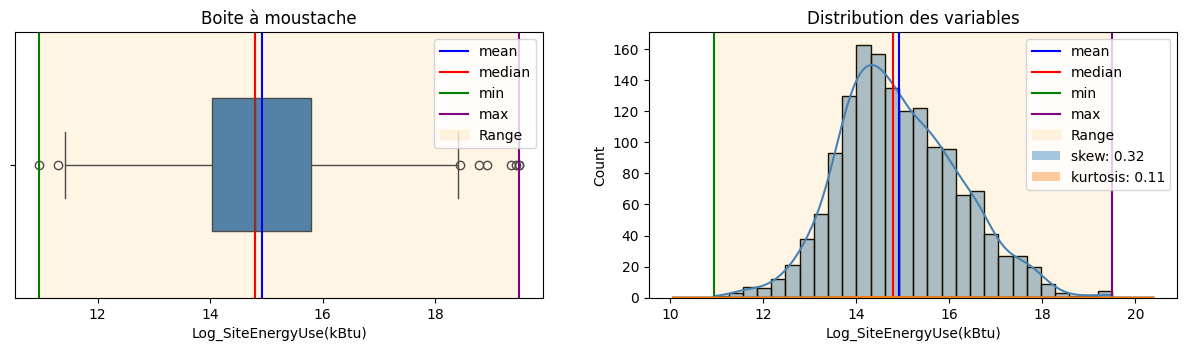

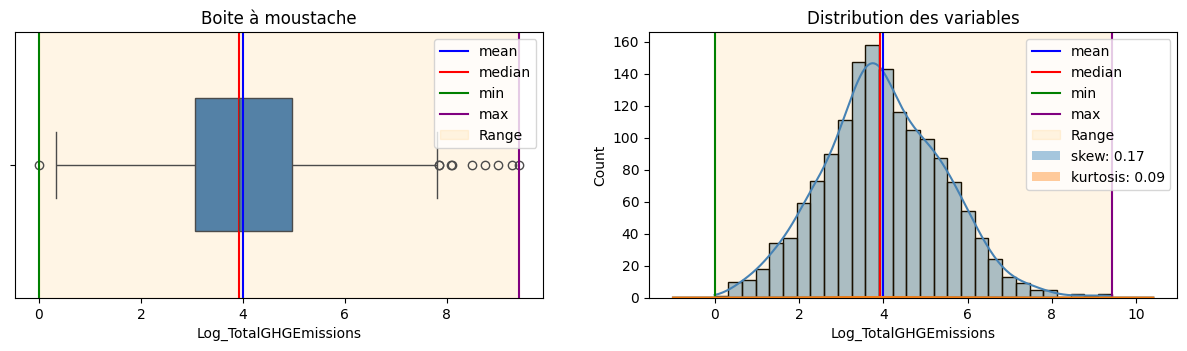

In [12]:
Targets =['Log_SiteEnergyUse(kBtu)','Log_TotalGHGEmissions']
Analyse_Univarie(data_2016_Prediction,Targets) 

## Targets Log_TotalGHGEmissions

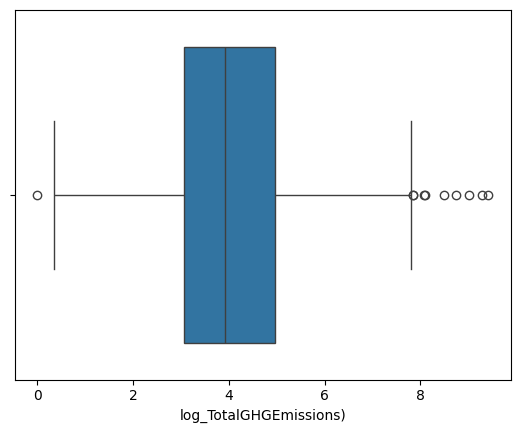

In [13]:
# Observer de 'TotalGHGEmissions'
plt.figure()
sns.boxplot(data_2016_Prediction['Log_TotalGHGEmissions'], orient="h")
plt.xlabel("log_TotalGHGEmissions)")
plt.show()

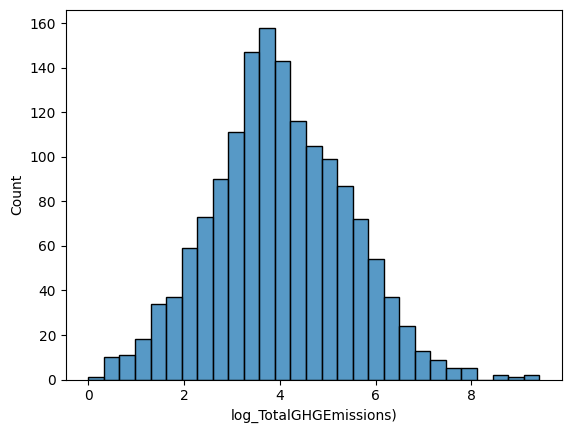

In [14]:
# Observer de 'TotalGHGEmissions'
plt.figure()
sns.histplot(data_2016_Prediction['Log_TotalGHGEmissions'])
plt.xlabel("log_TotalGHGEmissions)")
plt.show()

## Targets Log_SiteEnergyUse(kBtu)

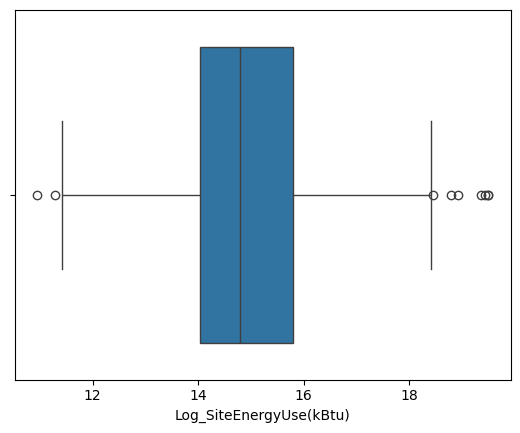

In [15]:
# Observer de 'Log_SiteEnergyUse(kBtu)'
plt.figure()
sns.boxplot(data_2016_Prediction['Log_SiteEnergyUse(kBtu)'], orient="h")
plt.xlabel("Log_SiteEnergyUse(kBtu)")
plt.show()

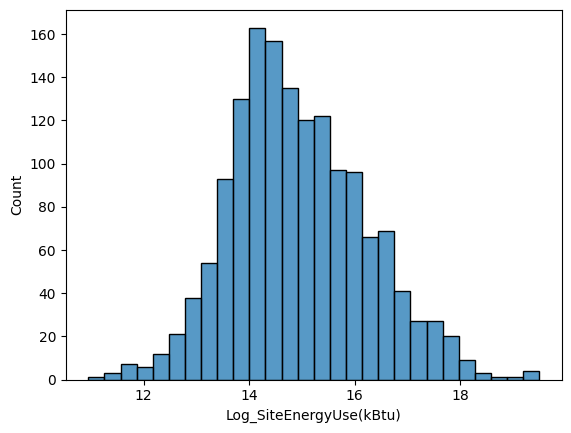

In [16]:
# Observer de 'Log_SiteEnergyUse(kBtu)'
plt.figure()
sns.histplot(data_2016_Prediction['Log_SiteEnergyUse(kBtu)'])
plt.xlabel("Log_SiteEnergyUse(kBtu)")
plt.show()

# 2.3 Test de normalité du targets Log_SiteEnergyUse(kBtu) et Log_TotalGHGEmissions

In [17]:
def Test_Normalite(data,target) :
#Si la p value des test est inférieur à 5%, on rejette H0 et on conclue que la distribution est non gaussienne(Non Normale).
#Si la p value des test est supérieur à 5%, on accepte H0 et on conclue que la distribution est gaussienne(Normale).

        for column in target :
            print('=================================================================================================')
            print('\n{}:'.format(column))
            k2, p = stats.normaltest(data[column], 
                                     axis=0,
                                     nan_policy = 'omit')
            alpha = 0.05
            print("p = {:g}".format(p))
            if p < alpha:  # null hypothese: x a une distribution normale
                print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
            else:
                print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

In [18]:
Targets =['Log_SiteEnergyUse(kBtu)','Log_TotalGHGEmissions']
Test_Normalite(data_2016_Prediction,Targets) 


Log_SiteEnergyUse(kBtu):
p = 2.72985e-06
H0 est rejetée : Log_SiteEnergyUse(kBtu) n'est pas de distribution normale

Log_TotalGHGEmissions:
p = 0.0183412
H0 est rejetée : Log_TotalGHGEmissions n'est pas de distribution normale


In [19]:
#Kolmogorov-Smirnov test for goodness of fit
from scipy import stats
x = data_2016_Prediction['Log_SiteEnergyUse(kBtu)']
x_norm = (x - x.mean())/x.std()
stats.kstest(x_norm, stats.norm.cdf)

KstestResult(statistic=0.04869995026623686, pvalue=0.001407062261795682, statistic_location=-0.2556761828178228, statistic_sign=1)

In [20]:
import scipy.stats as st
def shapiro_wilk_test(var):
    """
    Statistical test to evaluate if a variable follows a normal distribution.
    
    H0 hypothesis : The variable follows a normal distribution
    
    Args:
        var(Dataframe series): Varibale to test
        
    Returns:
        stat(float): The test statistic
        
        p-value(float): The p-value of the test
    
    """
    print("-"*50)
    print(f"Test statistique de normalité de la variable {var.name}\n")
    stat, p = st.shapiro(var)
    print(f"""Indicateur statistique: {stat}\n p valeur: {p}\n""")
    if p < 0.05:
        print("L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%\n" )
    if p > 0.05:
        print("L'hypothèse H0 ne peut être rejetée avec un risque de 5\n")
    print("-"*50)
    return stat, p

#shapiro_wilk_test(data["additives_n"].notna())

In [21]:
x = data_2016_Prediction['Log_SiteEnergyUse(kBtu)']
shapiro_wilk_test(x)

--------------------------------------------------
Test statistique de normalité de la variable Log_SiteEnergyUse(kBtu)

Indicateur statistique: 0.9912528395652771
 p valeur: 6.988054934708998e-08

L'hypothèse H0 de normalité peut être rejetée avec un risque de 5%

--------------------------------------------------


(0.9912528395652771, 6.988054934708998e-08)

# **2.4 Modélisation de la consommation d'énergie 'Log_SiteEnergyUse(kBtu)'**

Afin de tester notre meilleur modèle sur des données "inconnues", nous allons mettre de côté une partie des données initiales qui ne seront pas inclusent dans les modèles intermédiaires. Nous allons donc spliter nos données pour obtenir un jeu d'entrainement et un jeu de test (30% des données).

# 2.4.1 Séparation des variables d'entrée et de sortie


- La variable 'SiteEnergyUse(kBtu)' passera en y comme variable target pour ce notebook.
'ENERGYSTARScore' est insuffisement complété. Nous allons l'écarter du dataset pour la prédiction de l'énergie. Nous supprimerons égalent la variable 'TotalGHGEmissions' qui est notre deuxième target. Le reste des variables formera notre matrice de données X de dimension 1513 lignes et 27 colonnes.


In [22]:
y = data_2016_Prediction['Log_SiteEnergyUse(kBtu)']
X_ = data_2016_Prediction.drop(columns=['Log_SiteEnergyUse(kBtu)','Log_TotalGHGEmissions',
                                        'SiteEnergyUse(kBtu)','TotalGHGEmissions', 'ENERGYSTARScore'], axis=1)

In [23]:
X_

,PropertyGFATotal,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
0,1158691.0,16.0,10428219.0,1,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1765970.0,22.0,26489550.0,1,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,429405.0,35.0,14599770.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,879000.0,63.0,9669000.0,1,1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,374466.0,96.0,3370194.0,0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,24617.0,84.0,49234.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1519,30989.0,36.0,123956.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1520,33300.0,116.0,199800.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1521,23040.0,96.0,69120.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 1.2.2 Séparation des données en ensemble d'entraînement et ensemble de test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=0, test_size=0.3)

In [25]:
print ("Le jeu de données 'X_train' contient",  X_train.shape[0], "observations et",  X_train.shape[1], "features.") 
print ("Le vecteur 'y_train' contient", y_train.shape[0], "observations.") 
print ("Le jeu de données ''X_test contient", X_test.shape[0], "observations et", X_test.shape[1], "features.") 
print ("Le vecteur 'y_test' contient", y_test.shape[0], "observations.")  

Le jeu de données 'X_train' contient 1066 observations et 27 features.
Le vecteur 'y_train' contient 1066 observations.
Le jeu de données ''X_test contient 457 observations et 27 features.
Le vecteur 'y_test' contient 457 observations.


 - **Entrainement : 1066 lignes**
 - **Test : 457 lignes**

In [26]:
X_train.head(2)

,PropertyGFATotal,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
940,27876.0,62.0,83628.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259,45780.0,28.0,206280.0,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y_train.head(2)

940    14.419817
259    16.198208
Name: Log_SiteEnergyUse(kBtu), dtype: float64

In [28]:
X_test.head(2)

,PropertyGFATotal,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
1228,47554.0,85.0,95108.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1018,58492.0,77.0,175476.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
y_test.head(2)

1228    13.850449
1018    14.282023
Name: Log_SiteEnergyUse(kBtu), dtype: float64

# 1.2.3 Standardisation

 - Les données numériques (**'Surface_reelle','BuildingAge', 'Surface_reelle'**) doivent être standardisées pour entrer dans nos modèles de prédiction. 
 - Nous réaliserons un centrage-réduction via la méthode StandardScaler de Scikit-Learn.

In [30]:
# Rescale the input features
columns_to_scale = X_.columns[:3]
coumns_not_to_scale = X_.columns[3:]

scaler = StandardScaler()

X_train_scaled_ = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled_ = scaler.transform(X_test[columns_to_scale])

X_train_scaled = pd.DataFrame(X_train_scaled_, columns=columns_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_, columns=columns_to_scale)

In [31]:
X_train_not_to_scale = X_train[coumns_not_to_scale]
X_test_not_to_scale = X_test[coumns_not_to_scale]

In [32]:
X_train_not_to_scale.reset_index(inplace=True, drop=True)
X_test_not_to_scale.reset_index(inplace=True, drop=True)

In [33]:
X_train = pd.merge(X_train_scaled, X_train_not_to_scale, left_index =True, right_index = True)
X_train.shape

(1066, 27)

In [34]:
X_test = pd.merge(X_test_scaled, X_test_not_to_scale, left_index =True, right_index = True)
X_test.shape

(457, 27)

In [35]:
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ' , X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (1066, 27)
y_train.shape =  (1066,)
X_test.shape =  (457, 27)
y_test.shape =  (457,)


# 1.2.4  Comparaison de différents modèles de prédiction

Nous allons calculer 3 métriques pour évaluer nos modèles :

* **MAE : Mean Absolute Error.**   
La MAE, ou erreur absolue moyenne, est la moyenne des valeurs absolues des erreurs.
\begin{equation*}
MAE =  \frac{1}{n} \sum_{i=1}^n |y_i – \hat{y}_i|
\end{equation*}
La MAE est dans la même unité que la variable à prédire. Par conséquent, elle est facile à interpréter.
Cette métrique quantifie l’erreur réalisée par le modèle. Plus elle est élevée, moins le modèle est performant.  
La MAE pénalise autant les grandes erreurs que les petites erreurs, contrairement à la RMSE.
Du fait de l’utilisation d’une valeur absolue dans la somme, une erreur 3 fois plus grande aura 3 fois plus d’impact sur l’erreur. Cette métrique est sensible aux outliers. L’observation d’une valeur aberrante pénalise le modèle, mais moins que pour la RMSE.  

* **RMSE : Root Mean Squared Error.**  
La RMSE est la racine de l’erreur quadratique moyenne.
\begin{equation*} RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2} \end{equation*}

La RMSE pénalise plus fortement les grandes erreurs que les petites. Etant donné le carré dans la somme, une erreur 3 fois plus grande aura 9 fois plus d’impact sur la moyenne. Par conséquent elle est très sensible aux outliers.
Les outliers sont des points pour lesquels la valeur réelle est aberrante. La prédiction sera donc souvent très éloignée de cette valeur aberrante, ce qui accroît fortement la contribution des individus outliers dans cette métrique.

* **R² : Coefficient de détermination est le carré du coefficient de corrélation linéaire.**  
\begin{equation*} R^2 = 1 - \frac{\sum_{i=1}^{n}{(y_i-\hat{y}_i)^2}}{\sum_{i=1}^{n}{(y_i-\bar{y})^2}} \end{equation*}

Plus le $R^2$ est proche de 1 meilleur est notre prédiction. Le coefficient de détermination nous indique à quel point les valeurs prédites sont corrélées aux vraies valeurs. 

Avec 
* $y_i$: valeure réelle  
* $\hat{y}_i$: valeure prédite
* $\bar{y}$: valeure moyenne


In [36]:
# Create model
name_reg = 'Linéaire sans Cross-Validation '
model =LinearRegression()

start_timeLRs = time.time()
# Fit model
model.fit(X_train, y_train)
elapsed_timeLRs = time.time() - start_timeLRs
# Prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluate
df_Result = pd.DataFrame({}) 



rmse_test11 = np.round(np.sqrt(mean_squared_error(y_test, y_pred_test)),2)
rmse_train11 = np.round(np.sqrt(mean_squared_error(y_train, y_pred_train)),2)






df_Result.loc["",'Modèle'] = name_reg 
df_Result.loc["",'Variable'] = 'Log_SiteEnergyUse(kBtu)'
df_Result.loc["",'R2'] = metrics.r2_score(y_test, y_pred_test)
#df_Result.loc["",'RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
df_Result.loc["",'RMSE'] = rmse_test11

df_Result.loc["",'MAE'] = metrics.mean_absolute_error(y_test, y_pred_test)
df_Result.loc["",'Temps d\'exécution'] = elapsed_timeLRs
df_Result.loc["",'Score'] = model.score(X_test, y_test)

df_Result

,Modèle,Variable,R2,RMSE,MAE,Temps d'exécution,Score
,Linéaire sans Cross-Validation,Log_SiteEnergyUse(kBtu),0.622628,0.79,0.599893,0.00311,0.622628


# 1.2.4.1 Regression lineaire

In [37]:
# Définition du modèle de régression linéaire
modele_lr = LinearRegression()

# Définition de la grille de paramètres
param_grid_lr = {}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_lr = GridSearchCV(modele_lr, param_grid_lr, cv=kf, scoring='r2', n_jobs=-1)

# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeLR = time.time()
grid_search_lr.fit(X_train, y_train)
elapsed_timeLR = time.time() - start_timeLR
best_lr = grid_search_lr.best_estimator_
y_predlr = best_lr.predict(X_test)
r2_2lr = r2_score(y_test, y_predlr)
mse2lr = mean_squared_error(y_test, y_predlr)

# Affichage des résultats pour consommation d'énergie
results1linreg = pd.DataFrame({'Variable': ['Log_SiteEnergyUse(kBtu)'],
                         'Modèle': ['Régression linéaire'],
                         'R2': [r2_2lr],
                         'RMSE': [mse2lr ** 0.5],
                         'MAE': [abs(y_test - y_predlr).mean()],
                         'Temps d\'exécution': [elapsed_timeLR],
                         'Score': best_lr.score(X_test, y_test)
                              })


In [38]:
results1linreg =round(results1linreg,4)
results1linreg

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_SiteEnergyUse(kBtu),Régression linéaire,0.6226,0.7941,0.5999,2.115,0.6226


In [39]:
best_lr

LinearRegression()

# 1.2.4.2 ElasticNet

In [40]:
# Définition du modèle Elastic Net
modele_en = ElasticNet(random_state=42)

# Définition de la grille de paramètres
param_grid_en = {
    'alpha': [0.1, 0.5, 1, 5, 10], # Facteur de régularisation
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # Coefficient de mélange de la régularisation L1 et L2
}
# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_en = GridSearchCV(modele_en, param_grid_en, cv=kf, scoring='r2', n_jobs=-1)

# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeEN = time.time()
grid_search_en.fit(X_train, y_train)
elapsed_timeEN = time.time() - start_timeEN
best_ElasticNet = grid_search_en.best_estimator_
y_predEN = best_ElasticNet.predict(X_test)
r2_2EN = r2_score(y_test, y_predEN)
mse2EN = mean_squared_error(y_test, y_predEN)

# Affichage des résultats pour consommation d'énergie
results1en = pd.DataFrame({'Variable': ['Log_SiteEnergyUse(kBtu)'],
                          'Modèle': ['Elastic Net'],
                         'R2': [r2_2EN],
                         'RMSE': [mse2EN ** 0.5],
                         'MAE': [abs(y_test - y_predEN).mean()],
                         'Temps d\'exécution': [elapsed_timeEN],
                          'Score': best_ElasticNet.score(X_test, y_test)
                              })


In [41]:
results1en =round(results1en,4)
results1en

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_SiteEnergyUse(kBtu),Elastic Net,0.5336,0.8827,0.6949,1.3035,0.5336


In [42]:
best_ElasticNet

ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)

 # 1.2.4.3 LinearSVR

In [43]:
# Définition du modèle LinearSVR
modele_svr = LinearSVR(random_state=42)

# Définition de la grille de paramètres
param_grid_svr = {'epsilon' : np.logspace(-5, 5, 10), 
              'C' : np.logspace(0, 10, 10)
}
# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_svr = GridSearchCV(modele_svr, param_grid_svr, cv=kf, scoring='r2', n_jobs=-1)

# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeSVR = time.time()
grid_search_svr.fit(X_train, y_train)
elapsed_timeSVR = time.time() - start_timeSVR
best_svr = grid_search_svr.best_estimator_
y_predSVR = best_svr.predict(X_test)
r2_2SVR = r2_score(y_test, y_predSVR)
mse2SVR = mean_squared_error(y_test, y_predSVR)

# Affichage des résultats pour consommation d'énergie
results1svr = pd.DataFrame({'Variable': ['Log_SiteEnergyUse(kBtu)'],
                         'Modèle': ['SVR'],
                         'R2': [r2_2SVR],
                         'RMSE': [mse2SVR ** 0.5],
                         'MAE': [abs(y_test - y_predSVR).mean()],
                         'Temps d\'exécution': [elapsed_timeSVR],
                          'Score': best_svr.score(X_test, y_test)
                              })

In [44]:
results1svr =round(results1svr,4)
results1svr

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_SiteEnergyUse(kBtu),SVR,0.5398,0.8769,0.6116,1.5109,0.5398


In [45]:
best_svr

LinearSVR(epsilon=0.2782559402207126, random_state=42)

# 1.2.4.4  'RandomForest': RandomForestRegressor()

In [46]:
# Définition du modèle Random Forest
modele_rf = RandomForestRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Nombre d'arbres dans la forêt
    'max_depth': [5, 10, 20, None], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(modele_rf, param_grid_rf, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeRF = time.time()
grid_search_rf.fit(X_train, y_train)
elapsed_timeRF = time.time() - start_timeRF
best_rf = grid_search_rf.best_estimator_
y_predRF = best_rf.predict(X_test)
r2_2RF = r2_score(y_test, y_predRF)
mse2RF = mean_squared_error(y_test, y_predRF)


# Affichage des résultats pour consommation d'énergie
results1forest = pd.DataFrame({'Variable': ['Log_SiteEnergyUse(kBtu)'],
                         'Modèle': ['Random Forest'],
                         'R2': [r2_2RF],
                         'RMSE': [mse2RF ** 0.5],
                         'MAE': [abs(y_test - y_predRF).mean()],
                         'Temps d\'exécution': [elapsed_timeRF],
                         'Score': best_rf.score(X_test, y_test)
                              })

                        

In [47]:
results1forest =round(results1forest,4)
results1forest

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_SiteEnergyUse(kBtu),Random Forest,0.7553,0.6394,0.4764,34.6139,0.7553


In [48]:
best_rf

RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=300, random_state=42)

# 1.2.4.5 GradientBoostingRegressor

In [49]:
# Définition du modèle Gradient Boost
modele_gb = GradientBoostingRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid_gb = {
    'n_estimators': [100, 200, 300], # Nombre d'estimateurs
    'learning_rate': [0.1, 0.05, 0.01], # Taux d'apprentissage
    'max_depth': [3, 5, 10], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_gb = GridSearchCV(modele_gb, param_grid_gb, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeGB = time.time()
grid_search_gb.fit(X_train, y_train)
elapsed_timeGB = time.time() - start_timeGB
best_gb = grid_search_gb.best_estimator_
y_predGB = best_gb.predict(X_test)
r2_2GB = r2_score(y_test, y_predGB)
mse2GB = mean_squared_error(y_test, y_predGB)


results1gb = pd.DataFrame({'Variable': ['Log_SiteEnergyUse(kBtu)'],
                        'Modèle': ['Gradient Boost'],
                        'R2': [r2_2GB],
                        'RMSE': [mse2GB ** 0.5],
                        'MAE': [abs(y_test - y_predGB).mean()],
                        'Temps d\'exécution': [elapsed_timeGB],
                         'Score': best_gb.score(X_test, y_test)
                              })


In [50]:
results1gb =round(results1gb,4)
results1gb

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_SiteEnergyUse(kBtu),Gradient Boost,0.7538,0.6414,0.4806,49.5516,0.7538


In [51]:
best_gb 

GradientBoostingRegressor(max_features='sqrt', min_samples_split=10,
                          n_estimators=200, random_state=42)

# **1.2.4.5 Résultats du target "Log_SiteEnergyUse(kBtu)"**

In [52]:
print("Résultats pour la variable Log_SiteEnergyUse(kBtu) :")
results1 = pd.concat([results1linreg,results1en,results1svr ,results1forest,results1gb])
#Rindexer la base avec les noms des produits
results1.set_index('Modèle',inplace=True)
results1 =round(results1 ,4)
results1.sort_values("R2")

Résultats pour la variable Log_SiteEnergyUse(kBtu) :


,Variable,R2,RMSE,MAE,Temps d'exécution,Score
Modèle,,,,,,
Elastic Net,Log_SiteEnergyUse(kBtu),0.5336,0.8827,0.6949,1.3035,0.5336
SVR,Log_SiteEnergyUse(kBtu),0.5398,0.8769,0.6116,1.5109,0.5398
Régression linéaire,Log_SiteEnergyUse(kBtu),0.6226,0.7941,0.5999,2.1150,0.6226
Gradient Boost,Log_SiteEnergyUse(kBtu),0.7538,0.6414,0.4806,49.5516,0.7538
Random Forest,Log_SiteEnergyUse(kBtu),0.7553,0.6394,0.4764,34.6139,0.7553


- **Evaluation selon le coefficient de détermination (R2):** le meilleur modèle selon **R2** est **"Random Forest"** **0.7553**
- **Evaluation selon MEA** : Le modèle le plus performant est celui qui minimise MAE.
    Donc, le modèle le plus performant est **"Random Forest" (MAE=0.4764	)**, et le moins performant est **Elastic_Net** **(MAE= 0.6949).**
- **RMSE** : La valeur la plus basse celle du modèle **Random Forest** **0.6394**	 
- **Evaluation selon le temps d'entrainement :** Le modèle le plus rapide est **Elastic_Net.**


- **Le modèle "Random Forest" est le modèle le plus performant**

In [53]:
def Graph_Compar_lineaire_Methode (data,methode) :
            
            for col in methode :
                df_methode_sort = pd.DataFrame(data[col].sort_values())
                plt.figure(figsize=(6,6))
                plt.title('Comparaison des modèles linéaires')
                ax = sns.barplot(y = df_methode_sort.index , x = df_methode_sort[col], palette= 'Dark2')
                ax.set_yticklabels(labels = df_methode_sort.index, rotation=0, horizontalalignment='right',size=14)
            return plt.show()

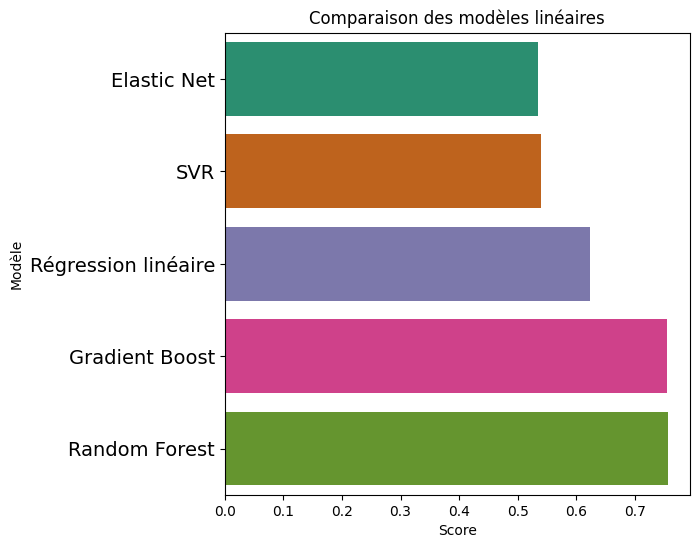

In [54]:

Graph_Compar_lineaire_Methode (results1,["Score"]) 

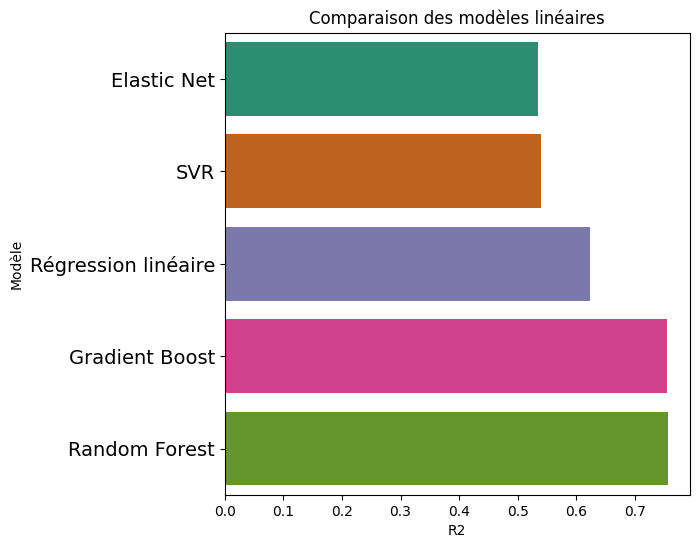

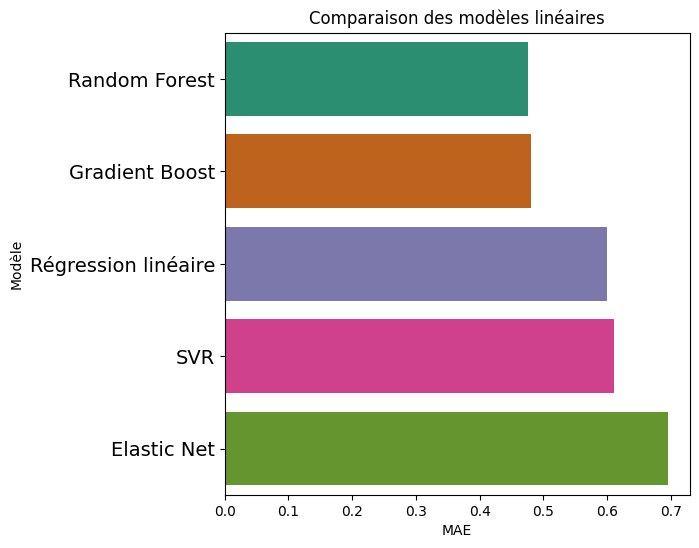

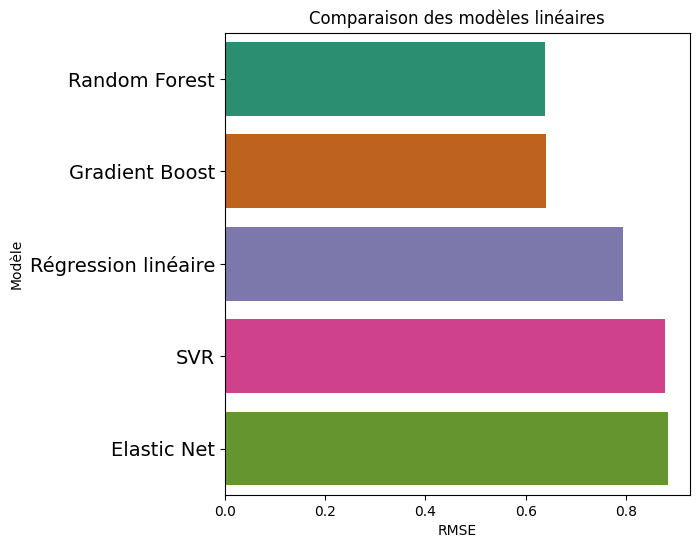

In [55]:
Methode =["R2","MAE","RMSE"]
Graph_Compar_lineaire_Methode (results1,Methode) 

In [56]:
# fonction pour representer les resultats 
def graph(models, X_train, X_test, y_train, y_test):
    for  i, model in enumerate(models):
        
        models[model].fit(X_train, y_train)
        y_pred1 = models[model].predict(X_test)
        comparison = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred1}).reset_index()
        sns.lmplot(data=comparison,x='y_test', y='y_pred',line_kws={"color":"r"})
        ax = plt.gca()
        ax.set_title(' métode {} \n'.format(model), fontweight="bold")
        plt.xlabel('y_test')
        plt.ylabel('y_pred')
        plt.show()

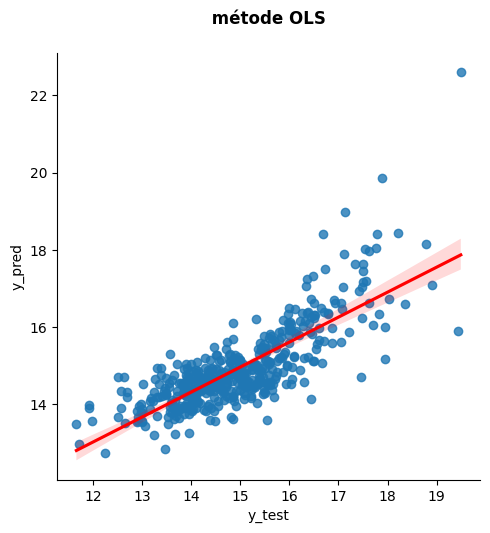

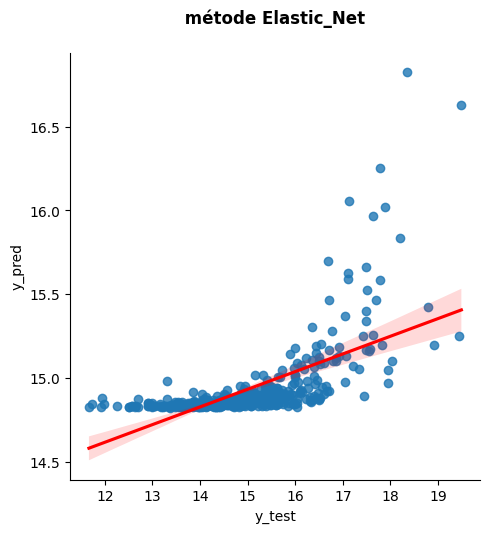

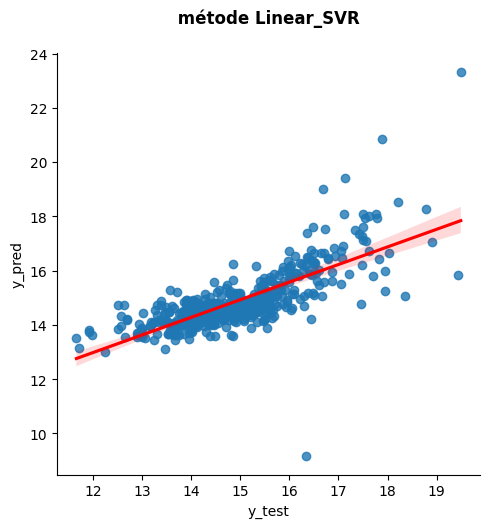

In [57]:
graph({'OLS': LinearRegression(),'Elastic_Net' : ElasticNet(),'Linear_SVR' : LinearSVR()} ,X_train, X_test, y_train, y_test)

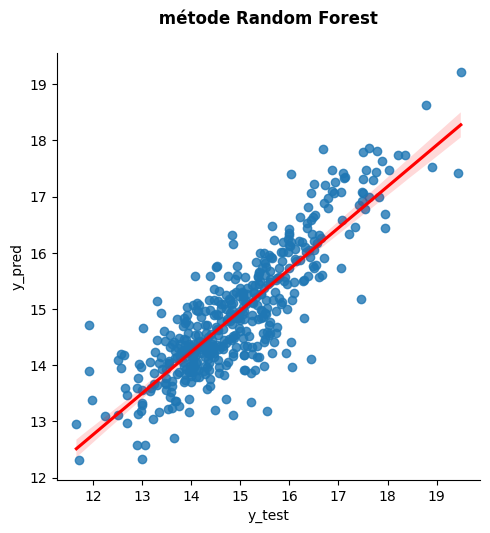

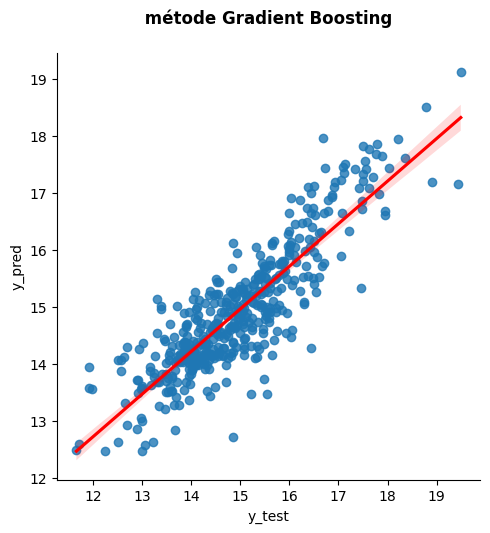

In [58]:
graph({ 'Random Forest': RandomForestRegressor(),'Gradient Boosting': GradientBoostingRegressor()} ,
        X_train, X_test, y_train, y_test)

# 1.2.9 **Feature Importance**

# 1.2.9.1 Méthode 1

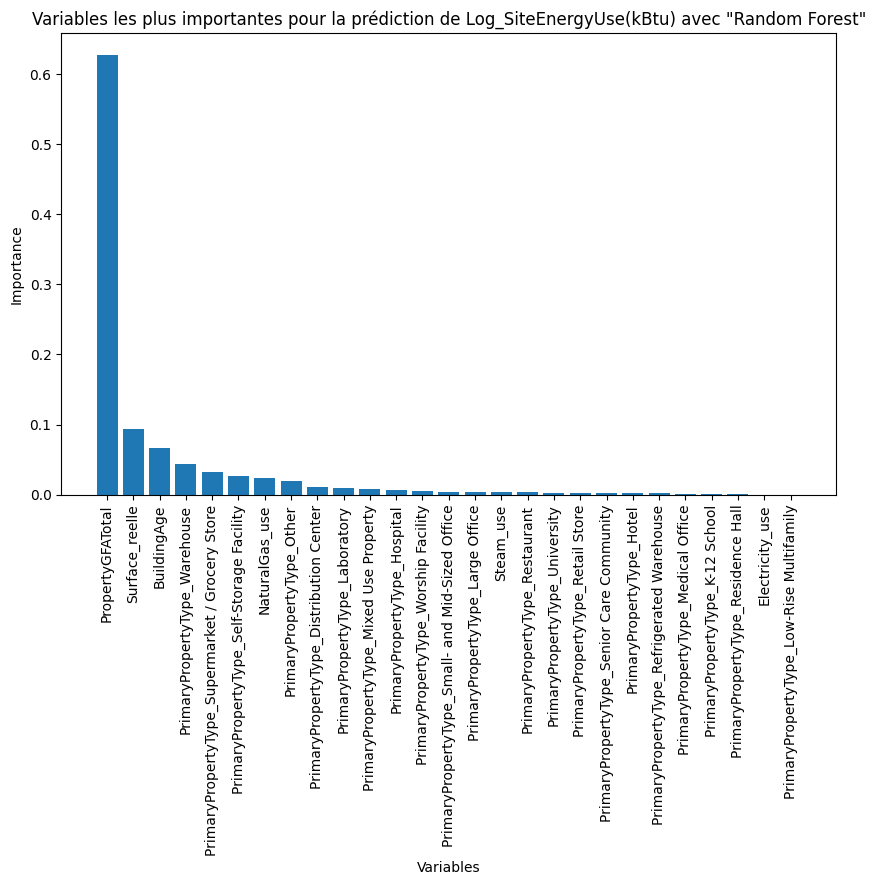

In [59]:
importance_df = pd.DataFrame(columns=['Variable', 'Importance'])  # Initialisation d'un DataFrame pour stocker les résultats d'importance des variables

# Définition du modèle Random Forest
rfm1 = RandomForestRegressor(random_state=42)

# Modèle pour la variable d'émission de CO2
rfm1.fit(X_train, y_train)
importance_df['Variable'] = X_train.columns
importance_df['Importance'] = rfm1.feature_importances_
importance_df.sort_values('Importance', ascending=False, inplace=True)  # Tri des variables par ordre d'importance
plt.figure(figsize=(10,6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Variables les plus importantes pour la prédiction de Log_SiteEnergyUse(kBtu) avec "Random Forest"')
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.show()


In [60]:
importance_df

,Variable,Importance
0,PropertyGFATotal,0.627822
2,Surface_reelle,0.093270
1,BuildingAge,0.066984
25,PrimaryPropertyType_Warehouse,0.043440
23,PrimaryPropertyType_Supermarket / Grocery Store,0.032619
20,PrimaryPropertyType_Self-Storage Facility,0.026002
3,NaturalGas_use,0.024136
15,PrimaryPropertyType_Other,0.018827
6,PrimaryPropertyType_Distribution Center,0.011122
10,PrimaryPropertyType_Laboratory,0.008823



**Interprétation**

- Nous constatons que la variable **"PropertyGFATotal"** a la plus grande importance dans la prédiction de la consommation d'énergie : **Log_SiteEnergyUse(kBtu).**


# 1.2.9.2 Méthode 2

In [61]:
param_grid_rfm2 = {'max_depth': [5, 10, 20, 30],
                                  'n_estimators': [100, 150, 200]}

grid_rfm2 = GridSearchCV ( RandomForestRegressor(), 
                    param_grid_rfm2, 
                    cv= 5, 
                   )
#entrainer le modèle 
grid_rfm2.fit(X_train, y_train)  

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'n_estimators': [100, 150, 200]})

<BarContainer object of 27 artists>

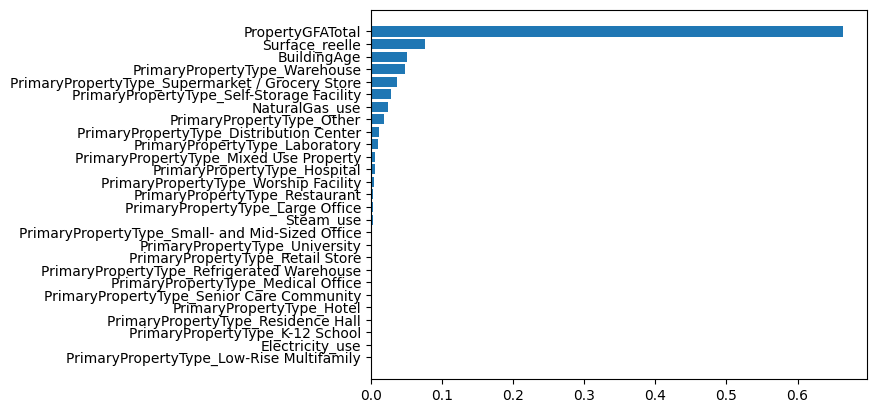

In [62]:
features= X_train.columns
f_i = list(zip(features,grid_rfm2.best_estimator_.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

- Nous constatons que la variable **"PropertyGFATotal"** a la plus grande importance dans la prédiction de la consommation d'énergie : **Log_SiteEnergyUse(kBtu).**

# 1.2.9.3 Méthode 3

PermutationExplainer explainer: 1524it [04:28,  5.51it/s]                                                              


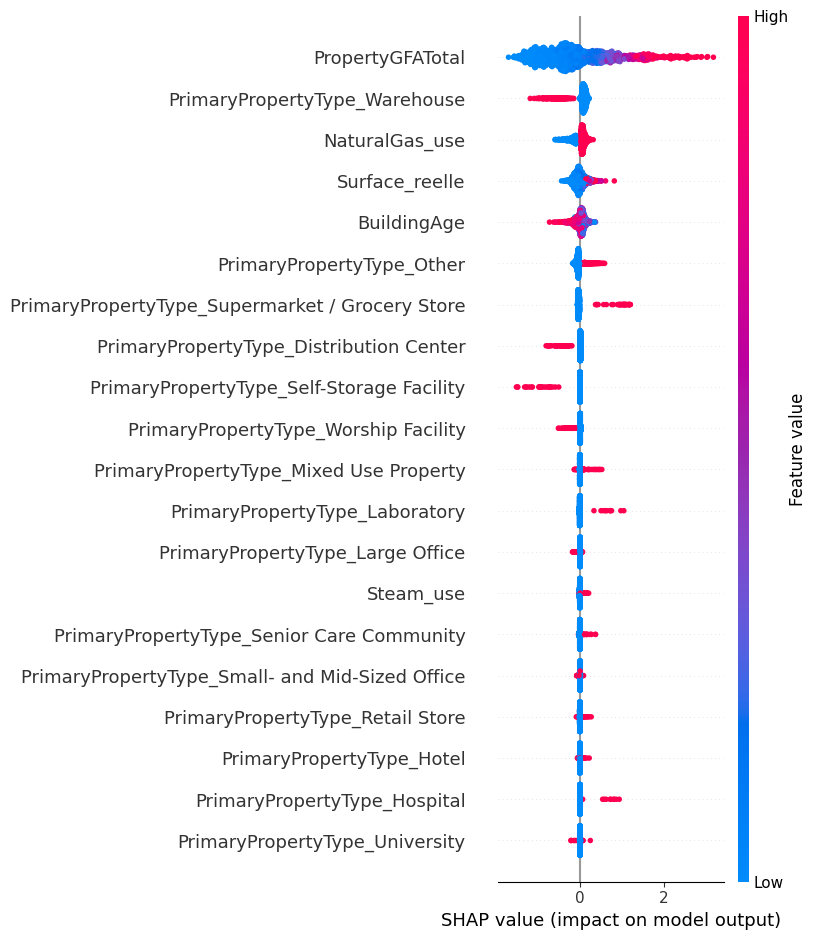

In [63]:
# Définition du modèle " RandomForestRegressor"
rf = RandomForestRegressor(random_state=42)

# Entraînement du modèle
rf.fit(X_, y)

# Calcul des valeurs de Shapley pour la variable  Log_SiteEnergyUse(kBtu)
explainer = shap.Explainer(rf.predict, X_)
shap_values = explainer(X_)
shap.summary_plot(shap_values,X_)


- Nous constatons que la variable **"PropertyGFATotal"** a la plus grande importance dans la prédiction de la consommation d'énergie : **Log_SiteEnergyUse(kBtu).**

 # **1.3 Modélisation d'émissions de CO2 'Log_TotalGHGEmissions'**

# 1.3.1  Séparation des variables d'entrée et de sortie

In [64]:
y2 = data_2016_Prediction['Log_TotalGHGEmissions']
X2_ = data_2016_Prediction.drop(columns=['Log_SiteEnergyUse(kBtu)','Log_TotalGHGEmissions',
                                        'SiteEnergyUse(kBtu)','TotalGHGEmissions', 'ENERGYSTARScore'], axis=1)

In [65]:
X2_

,PropertyGFATotal,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
0,1158691.0,16.0,10428219.0,1,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1765970.0,22.0,26489550.0,1,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,429405.0,35.0,14599770.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,879000.0,63.0,9669000.0,1,1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,374466.0,96.0,3370194.0,0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,24617.0,84.0,49234.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1519,30989.0,36.0,123956.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1520,33300.0,116.0,199800.0,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1521,23040.0,96.0,69120.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 1.3.2 Séparation des données en ensemble d'entraînement et ensemble de test

In [66]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_, y2, random_state=0, test_size=0.3)

In [67]:
print ("Le jeu de données 'X2_train' contient",  X2_train.shape[0], "observations et",  X2_train.shape[1], "features.") 
print ("Le vecteur 'y2_train' contient", y2_train.shape[0], "observations.") 
print ("Le jeu de données ''X2_test contient", X2_test.shape[0], "observations et", X2_test.shape[1], "features.") 
print ("Le vecteur 'y2_test' contient", y2_test.shape[0], "observations.")  

Le jeu de données 'X2_train' contient 1066 observations et 27 features.
Le vecteur 'y2_train' contient 1066 observations.
Le jeu de données ''X2_test contient 457 observations et 27 features.
Le vecteur 'y2_test' contient 457 observations.


In [68]:
X2_train.head(2)

,PropertyGFATotal,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
940,27876.0,62.0,83628.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
259,45780.0,28.0,206280.0,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
y2_train.head(2)

940    4.248067
259    6.138591
Name: Log_TotalGHGEmissions, dtype: float64

In [70]:
X2_test.head(2)

,PropertyGFATotal,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
1228,47554.0,85.0,95108.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1018,58492.0,77.0,175476.0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
y2_test.head(2)

1228    2.835564
1018    3.961955
Name: Log_TotalGHGEmissions, dtype: float64

# 1.3.3 Standardisation

In [72]:
# Rescale the input features
columns_to_scale = X2_.columns[:3]
coumns_not_to_scale = X2_.columns[3:]

scaler = StandardScaler()

X2_train_scaled_ = scaler.fit_transform(X2_train[columns_to_scale])
X2_test_scaled_ = scaler.transform(X2_test[columns_to_scale])

X2_train_scaled = pd.DataFrame(X2_train_scaled_, columns=columns_to_scale)
X2_test_scaled = pd.DataFrame(X2_test_scaled_, columns=columns_to_scale)

In [73]:
X2_train_not_to_scale = X2_train[coumns_not_to_scale]
X2_test_not_to_scale = X2_test[coumns_not_to_scale]

In [74]:
X2_train_not_to_scale.reset_index(inplace=True, drop=True)
X2_test_not_to_scale.reset_index(inplace=True, drop=True)

In [75]:
X2_train = pd.merge(X2_train_scaled, X2_train_not_to_scale, left_index =True, right_index = True)
X2_train.shape

(1066, 27)

In [76]:
X2_test = pd.merge(X2_test_scaled, X2_test_not_to_scale, left_index =True, right_index = True)
X2_test.shape

(457, 27)

In [77]:
print('X2_train.shape = ', X2_train.shape)
print('y2_train.shape = ', y2_train.shape)
print('X2_test.shape = ' , X2_test.shape)
print('y2_test.shape = ', y2_test.shape)

X2_train.shape =  (1066, 27)
y2_train.shape =  (1066,)
X2_test.shape =  (457, 27)
y2_test.shape =  (457,)


In [78]:
X2_train.head(3)

,PropertyGFATotal,BuildingAge,Surface_reelle,NaturalGas_use,Electricity_use,Steam_use,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
0,-0.458158,0.248195,-0.201999,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.359823,-0.789956,-0.179289,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.492496,0.248195,-0.209476,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 1.3.4 Comparaison de différents modèles de prédiction

# 1.3.4.1 Regression lineaire

In [79]:
# Définition du modèle de régression linéaire
modele_lr = LinearRegression()

# Définition de la grille de paramètres
param_grid_lr = {}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_lr2 = GridSearchCV(modele_lr, param_grid_lr, cv=kf, scoring='r2', n_jobs=-1)

# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeLR2 = time.time()
grid_search_lr2.fit(X2_train, y2_train)
elapsed_timeLR2 = time.time() - start_timeLR2
best_lr2 = grid_search_lr2.best_estimator_
y2_predLR2 = best_lr2.predict(X2_test)
r2_2LR2 = r2_score(y2_test, y2_predLR2)
mse2LR2 = mean_squared_error(y2_test, y2_predLR2)

# Affichage des résultats pour consommation d'énergie
results2linreg = pd.DataFrame({'Variable': ['Log_TotalGHGEmissions'],
                         'Modèle': ['Régression linéaire'],
                         'R2': [r2_2LR2],
                         'RMSE': [mse2LR2 ** 0.5],
                         'MAE': [abs(y2_test - y2_predLR2).mean()],
                         'Temps d\'exécution': [elapsed_timeLR2],
                         'Score': best_lr2.score(X2_test, y2_test)
                              })


In [80]:
results2linreg =round(results2linreg,4)
results2linreg

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_TotalGHGEmissions,Régression linéaire,0.6096,0.8982,0.6751,1.8895,0.6096


In [81]:
best_lr2

LinearRegression()

# 1.3.4.2 ElasticNet

In [82]:
# Définition du modèle Elastic Net
modele_en = ElasticNet(random_state=42)

# Définition de la grille de paramètres
param_grid_en = {
    'alpha': [0.1, 0.5, 1, 5, 10], # Facteur de régularisation
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # Coefficient de mélange de la régularisation L1 et L2
}
# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_en2 = GridSearchCV(modele_en, param_grid_en, cv=kf, scoring='r2', n_jobs=-1)

# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeEN2 = time.time()
grid_search_en2.fit(X2_train, y2_train)
elapsed_timeEN2 = time.time() - start_timeEN2
best_ElasticNet2 = grid_search_en2.best_estimator_
y2_predEN2 = best_ElasticNet2.predict(X2_test)
r2_2EN2 = r2_score(y2_test, y2_predEN2)
mse2EN2 = mean_squared_error(y2_test, y2_predEN2)

# Affichage des résultats pour consommation d'énergie
results2en = pd.DataFrame({'Variable': ['Log_TotalGHGEmissions'],
                          'Modèle': ['Elastic Net'],
                         'R2': [r2_2EN2],
                         'RMSE': [mse2EN2 ** 0.5],
                         'MAE': [abs(y2_test - y2_predEN2).mean()],
                         'Temps d\'exécution': [elapsed_timeEN2],
                         'Score': best_ElasticNet2.score(X2_test, y2_test)
                              })


In [83]:
results2en =round(results2en,4)
results2en

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_TotalGHGEmissions,Elastic Net,0.5524,0.9617,0.7472,1.2517,0.5524


In [84]:
best_ElasticNet2

ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)

 # 1.3.4.3 LinearSVR

In [85]:
# Définition du modèle LinearSVR
modele_svr = LinearSVR(random_state=42)

# Définition de la grille de paramètres
param_grid_svr = {'epsilon' : np.logspace(-5, 5, 10), 
              'C' : np.logspace(0, 10, 10)
}
# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_svr2 = GridSearchCV(modele_svr, param_grid_svr, cv=kf, scoring='r2', n_jobs=-1)

# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeSVR2 = time.time()
grid_search_svr2.fit(X2_train, y2_train)
elapsed_timeSVR2 = time.time() - start_timeSVR2
best_svr2 = grid_search_svr2.best_estimator_
y2_predSVR2 = best_svr2.predict(X2_test)
r2_2SVR2 = r2_score(y2_test, y2_predSVR2)
mse2SVR2 = mean_squared_error(y2_test, y2_predSVR2)

# Affichage des résultats pour consommation d'énergie
results2svr = pd.DataFrame({'Variable': ['Log_TotalGHGEmissions'],
                         'Modèle': ['SVR'],
                         'R2': [r2_2SVR2],
                         'RMSE': [mse2SVR2 ** 0.5],
                         'MAE': [abs(y2_test - y2_predSVR2).mean()],
                         'Temps d\'exécution': [elapsed_timeSVR2],
                         'Score': best_svr2.score(X2_test, y2_test)
                              })

In [86]:
results2svr =round(results2svr,4)
results2svr

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_TotalGHGEmissions,SVR,0.6313,0.8728,0.6713,1.3539,0.6313


In [87]:
best_svr2

LinearSVR(epsilon=0.0016681005372000592, random_state=42)

# 1.3.4.4  'RandomForest': RandomForestRegressor()

In [88]:
# Définition du modèle Random Forest
modele_rf = RandomForestRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Nombre d'arbres dans la forêt
    'max_depth': [5, 10, 20, None], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf2 = GridSearchCV(modele_rf, param_grid_rf, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeRF2 = time.time()
grid_search_rf2.fit(X2_train, y2_train)
elapsed_timeRF2 = time.time() - start_timeRF2
best_rf2 = grid_search_rf2.best_estimator_
y2_predRF2 = best_rf2.predict(X2_test)
r2_2RF2 = r2_score(y2_test, y2_predRF2)
mse2RF2 = mean_squared_error(y2_test, y2_predRF2)


# Affichage des résultats pour consommation d'énergie
results2forest = pd.DataFrame({'Variable': ['Log_TotalGHGEmissions'],
                         'Modèle': ['Random Forest'],
                         'R2': [r2_2RF2],
                         'RMSE': [mse2RF2 ** 0.5],
                         'MAE': [abs(y2_test - y2_predRF2).mean()],
                         'Temps d\'exécution': [elapsed_timeRF2],
                         'Score': best_rf2.score(X2_test, y2_test)
                              })


In [89]:
results2forest =round(results2forest,4)
results2forest

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_TotalGHGEmissions,Random Forest,0.7223,0.7575,0.5769,36.5557,0.7223


In [90]:
best_rf2

RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=300, random_state=42)

# 1.3.4.5 GradientBoostingRegressor

In [91]:
# Définition du modèle Gradient Boost
modele_gb = GradientBoostingRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid_gb = {
    'n_estimators': [100, 200, 300], # Nombre d'estimateurs
    'learning_rate': [0.1, 0.05, 0.01], # Taux d'apprentissage
    'max_depth': [3, 5, 10], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_gb2 = GridSearchCV(modele_gb, param_grid_gb, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeGB2 = time.time()
grid_search_gb2.fit(X2_train, y2_train)
elapsed_timeGB2 = time.time() - start_timeGB2
best_gb2 = grid_search_gb2.best_estimator_
y2_predGB2 = best_gb2.predict(X2_test)
r2_2GB2 = r2_score(y2_test, y2_predGB2)
mse2GB2 = mean_squared_error(y2_test, y2_predGB2)


results2gb = pd.DataFrame({'Variable': ['Log_TotalGHGEmissions'],
                        'Modèle': ['Gradient Boost'],
                        'R2': [r2_2GB2],
                        'RMSE': [mse2GB2 ** 0.5],
                        'MAE': [abs(y2_test - y2_predGB2).mean()],
                        'Temps d\'exécution': [elapsed_timeGB2],
                         'Score': best_gb2.score(X2_test, y2_test)
                              })

In [92]:
results2gb =round(results2gb,4)
results2gb

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_TotalGHGEmissions,Gradient Boost,0.7186,0.7625,0.5724,52.136,0.7186


In [93]:
best_gb2

GradientBoostingRegressor(max_features='sqrt', min_samples_leaf=2,
                          n_estimators=200, random_state=42)

# **1.3.5 Résultats du target Log_TotalGHGEmissions**

In [94]:
print("Résultats pour la variable Log_TotalGHGEmissions :")
results2 = pd.concat([results2linreg,results2en,results2svr ,results2forest,results2gb])
#Rindexer la base avec les noms des produits
results2.set_index('Modèle',inplace=True)
results2 =round(results2 ,4)
results2.sort_values("R2")

Résultats pour la variable Log_TotalGHGEmissions :


,Variable,R2,RMSE,MAE,Temps d'exécution,Score
Modèle,,,,,,
Elastic Net,Log_TotalGHGEmissions,0.5524,0.9617,0.7472,1.2517,0.5524
Régression linéaire,Log_TotalGHGEmissions,0.6096,0.8982,0.6751,1.8895,0.6096
SVR,Log_TotalGHGEmissions,0.6313,0.8728,0.6713,1.3539,0.6313
Gradient Boost,Log_TotalGHGEmissions,0.7186,0.7625,0.5724,52.1360,0.7186
Random Forest,Log_TotalGHGEmissions,0.7223,0.7575,0.5769,36.5557,0.7223


 - **Evaluation selon le coefficient de détermination (R2):** le meilleur modèle selon **R2** est **"Random Forest"** **0.7223**
- **Evaluation selon MAE** : Le modèle le plus performant est celui qui minimise MAE.
    Donc, le modèle le plus performant est **"Gradient Boost" (MAE=	0.5724)**, et le moins performant est **Elastic_Net** **(MAE= 0.7472	).**
- **RMSE** : La valeur la plus basse celle du modèle **Random Forest** **0.7575**	 
- **Evaluation selon le temps d'entrainement :** Le modèle le plus rapide est **Elastic_Net.**

- **Le modèle "Random Forest" est le modèle le plus performant**

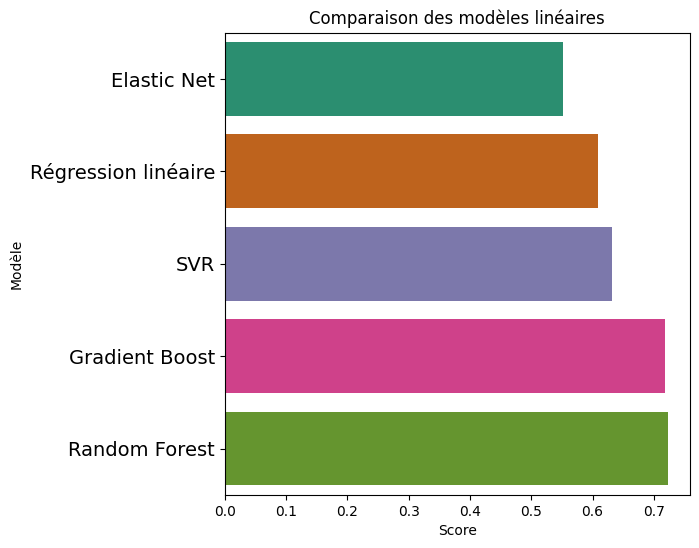

In [95]:
Graph_Compar_lineaire_Methode (results2,["Score"]) 

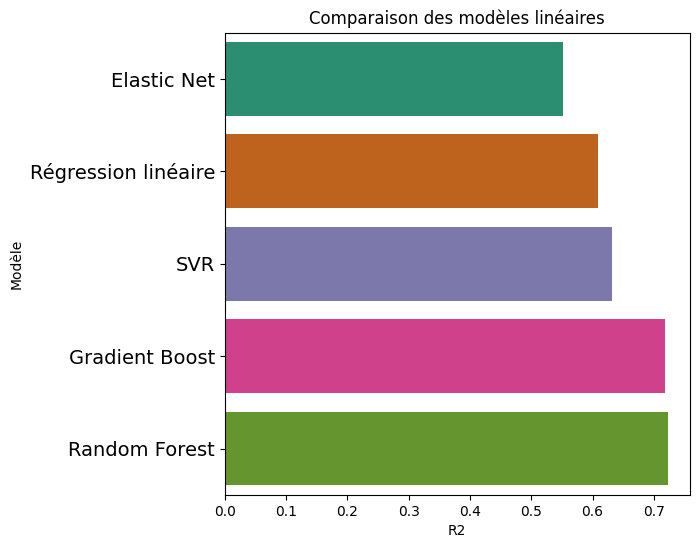

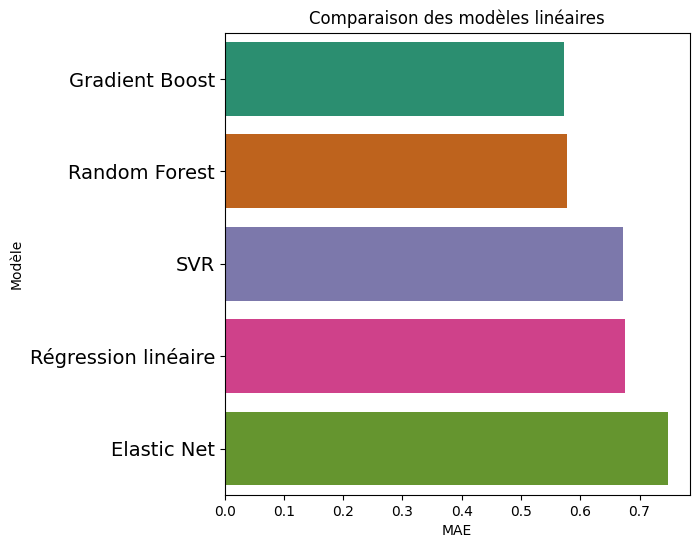

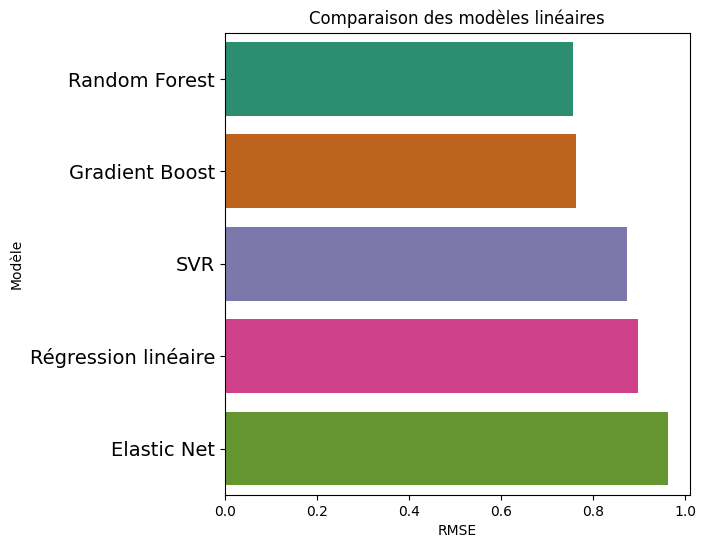

In [96]:
Methode =["R2","MAE","RMSE"]
Graph_Compar_lineaire_Methode (results2,Methode) 

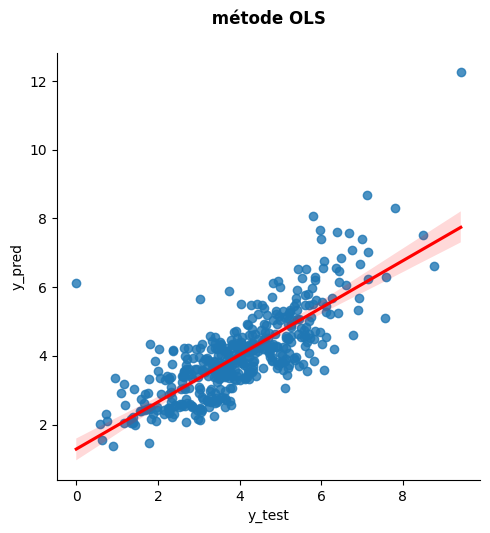

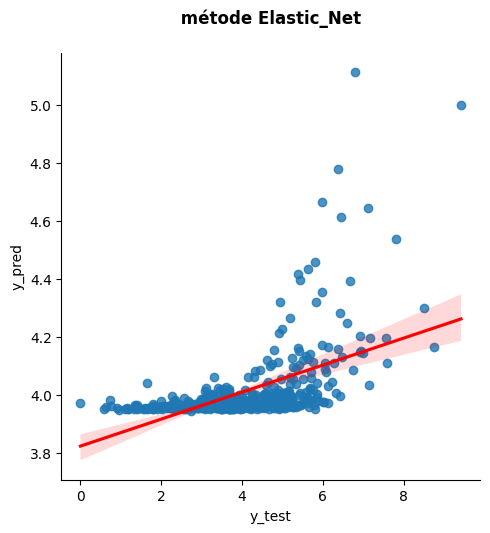

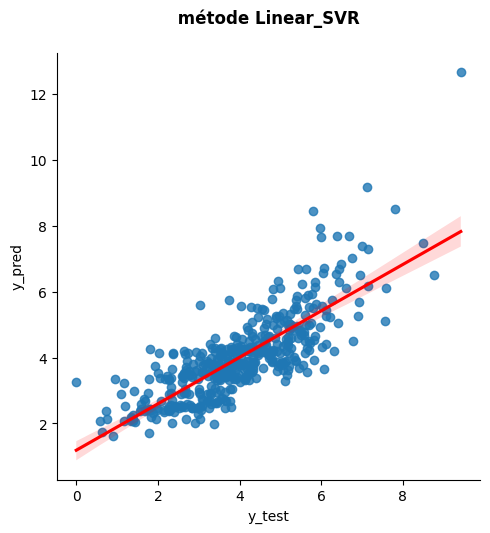

In [97]:
graph({'OLS': LinearRegression(),'Elastic_Net' : ElasticNet(),'Linear_SVR' : LinearSVR()} ,X2_train, X2_test, y2_train, y2_test)

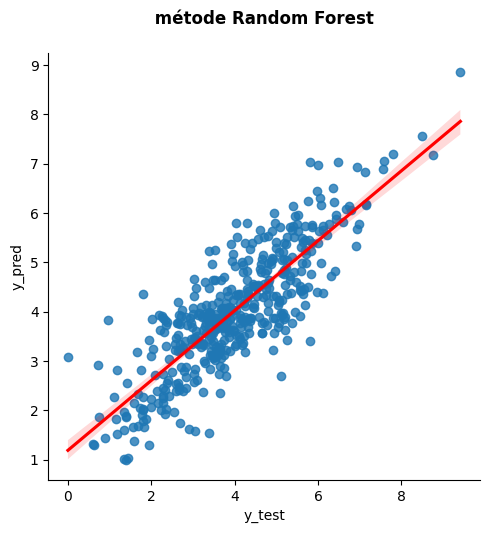

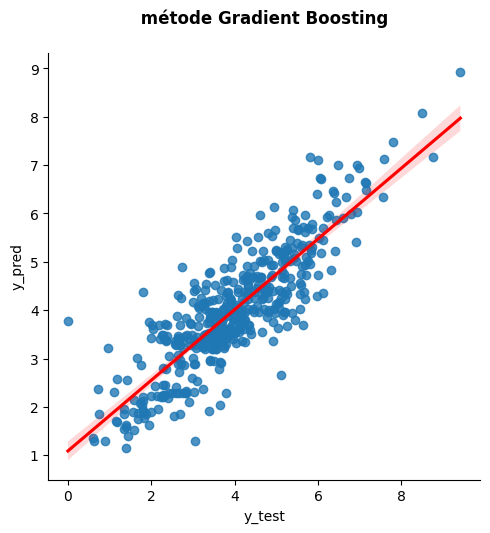

In [98]:
graph({ 'Random Forest': RandomForestRegressor(),'Gradient Boosting': GradientBoostingRegressor()} ,
        X2_train, X2_test, y2_train, y2_test)

# 1.3.6 **Feature Importance**

 # 1.3.6.1 Méthode 1

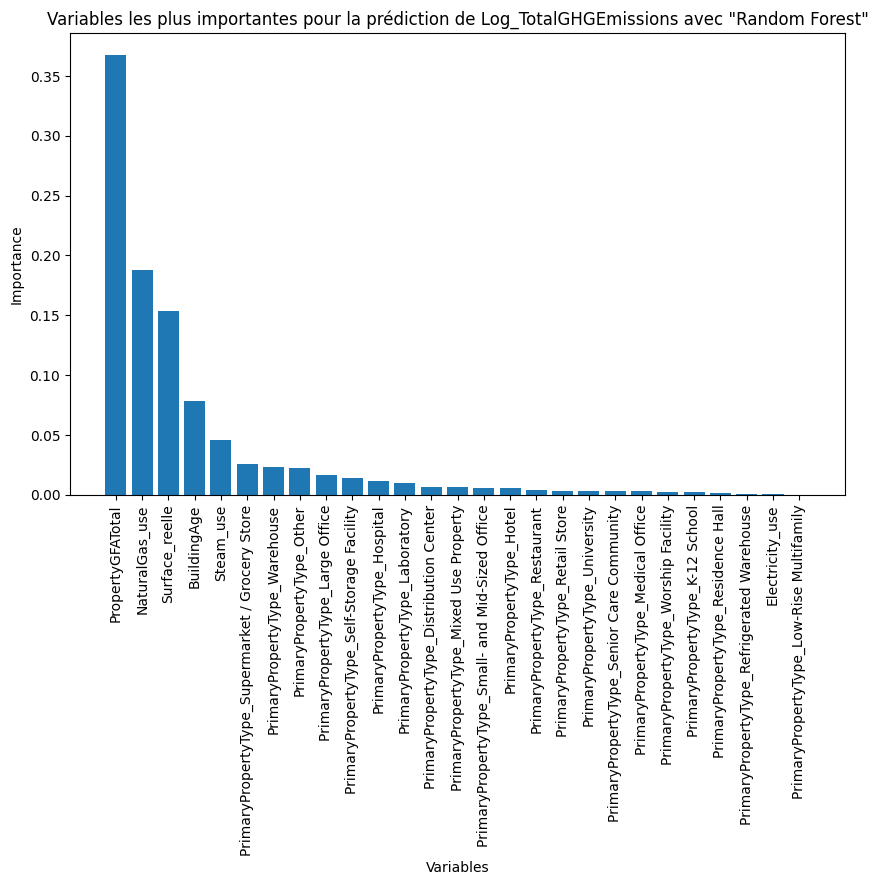

In [99]:
importance_df2 = pd.DataFrame(columns=['Variable', 'Importance'])  # Initialisation d'un DataFrame pour stocker les résultats d'importance des variables

# Définition du modèle Random Forest
rfm01 = RandomForestRegressor(random_state=42)

# Modèle"Random Forest" pour la variable d'émission de CO2
rfm01.fit(X2_train, y2_train)
importance_df2['Variable'] = X2_train.columns
importance_df2['Importance'] = rfm01.feature_importances_
importance_df2.sort_values('Importance', ascending=False, inplace=True)  # Tri des variables par ordre d'importance
plt.figure(figsize=(10,6))
plt.bar(importance_df2['Variable'], importance_df2['Importance'])
plt.xticks(rotation=90)
plt.title('Variables les plus importantes pour la prédiction de Log_TotalGHGEmissions avec "Random Forest"')
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.show()


In [100]:
importance_df2

,Variable,Importance
0,PropertyGFATotal,0.367812
3,NaturalGas_use,0.187359
2,Surface_reelle,0.153436
1,BuildingAge,0.078647
5,Steam_use,0.045288
23,PrimaryPropertyType_Supermarket / Grocery Store,0.025649
25,PrimaryPropertyType_Warehouse,0.022657
15,PrimaryPropertyType_Other,0.022088
11,PrimaryPropertyType_Large Office,0.016586
20,PrimaryPropertyType_Self-Storage Facility,0.013663


**Interprétation**

- Nous constatons que la variable **"PropertyGFATotal"** a la plus grande importance dans la prédiction de la consommation d'énergie : **Log_TotalGHGEmissions.**

# 1.3.6.2 Méthode 2

In [101]:
param_grid_rfm02 = {'max_depth': [5, 10, 20, 30],
                                  'n_estimators': [100, 150, 200]}

grid_rfm02 = GridSearchCV ( RandomForestRegressor(), 
                    param_grid_rfm02, 
                    cv= 5, 
                   )
#entrainer le modèle 
grid_rfm02.fit(X2_train, y2_train)  

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'n_estimators': [100, 150, 200]})

<BarContainer object of 27 artists>

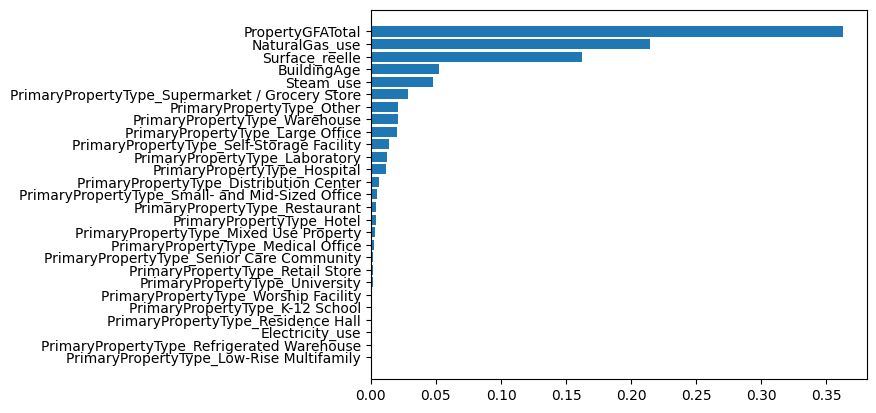

In [102]:
featuresm02= X2_train.columns
f_i = list(zip(featuresm02,grid_rfm02.best_estimator_.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

- Nous constatons que la variable **"PropertyGFATotal"** a la plus grande importance dans la prédiction de la consommation d'énergie : **Log_TotalGHGEmissions.**

# 1.3.6.3 Méthode 3

PermutationExplainer explainer: 1524it [04:24,  5.53it/s]                                                              


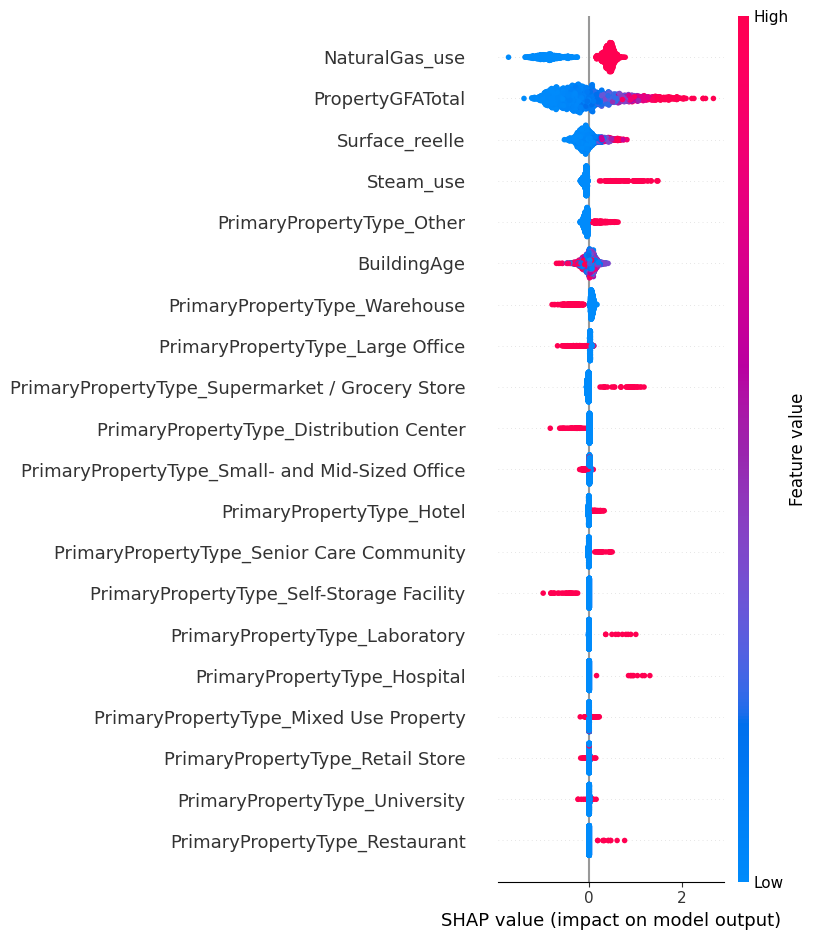

In [103]:
# Définition du modèle Ridge
rf = RandomForestRegressor(random_state=42)

# Entraînement du modèle
rf.fit(X2_, y2)

# Calcul des valeurs de Shapley pour la variable  Log_SiteEnergyUse(kBtu)
explainer02 = shap.Explainer(rf.predict, X2_)
shap_values02 = explainer02(X2_)
shap.summary_plot(shap_values02,X2_)

- Nous constatons que la variable **"PropertyGFATotal"** a la plus grande importance dans la prédiction de la consommation d'énergie : **Log_TotalGHGEmissions.**

# 1.4 **L'influence de ENERGY Star Score sur la prédiction**

In [104]:
data_2016_Prediction['ENERGYSTARScore'].describe()

count    1523.000000
mean       63.226527
std        26.426240
min         1.000000
25%        45.750000
50%        69.000000
75%        84.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

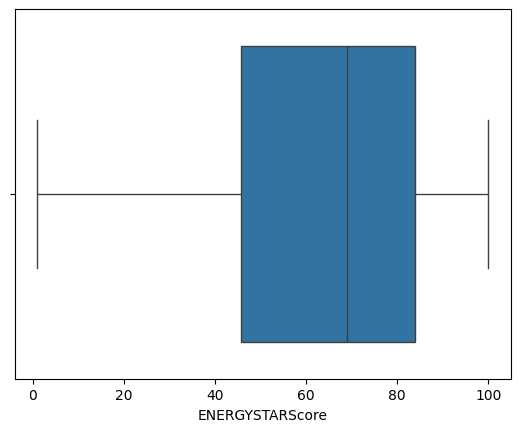

In [105]:
# Observer de 'Log_SiteEnergyUse(kBtu)'
plt.figure()
sns.boxplot(data_2016_Prediction['ENERGYSTARScore'], orient="h")
plt.xlabel("ENERGYSTARScore")
plt.show()

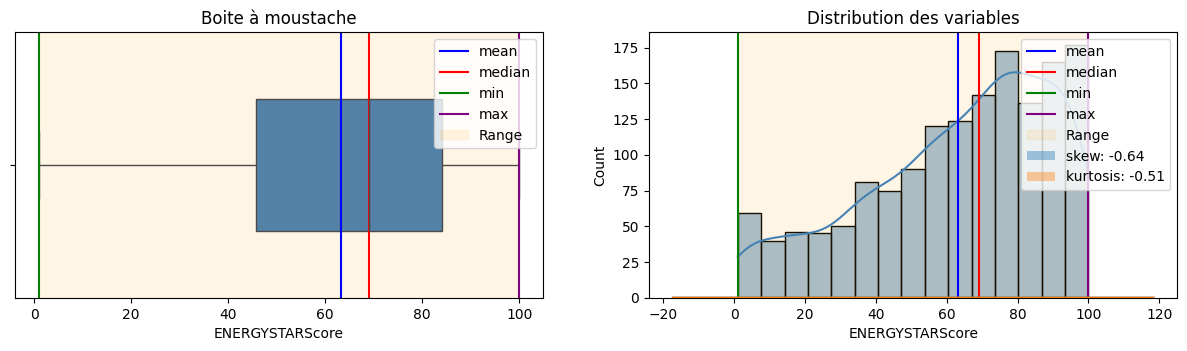

In [106]:
Analyse_Univarie(data_2016_Prediction,["ENERGYSTARScore"]) 

- **Il est exprimé sur une échelle de 1 à 100 facile ,plus le score est élevé, meilleure est la performance énergétique du bâtiment**


In [107]:
X2New_ = data_2016_Prediction.drop(columns=['Log_SiteEnergyUse(kBtu)','Log_TotalGHGEmissions',
                                        'SiteEnergyUse(kBtu)','TotalGHGEmissions'], axis=1)

In [108]:
X2New_.columns

Index(['PropertyGFATotal', 'ENERGYSTARScore', 'BuildingAge', 'Surface_reelle',
       'NaturalGas_use', 'Electricity_use', 'Steam_use',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyT

In [109]:
#Séparation des données en ensemble d'entraînement et ensemble de test
X2New_train, X2New_test, y2_train, y2_test = train_test_split(X2New_, y2, random_state=0, test_size=0.3)

In [110]:
#Standardisation

# Rescale the input features
columns_to_scale = X2New_.columns[:3]
coumns_not_to_scale = X2New_.columns[3:]

scaler = StandardScaler()

X2New_train_scaled_ = scaler.fit_transform(X2New_train[columns_to_scale])
X2New_test_scaled_ = scaler.transform(X2New_test[columns_to_scale])

X2New_train_scaled = pd.DataFrame(X2New_train_scaled_, columns=columns_to_scale)
X2New_test_scaled = pd.DataFrame(X2New_test_scaled_, columns=columns_to_scale)



X2New_train_not_to_scale = X2New_train[coumns_not_to_scale]
X2New_test_not_to_scale = X2New_test[coumns_not_to_scale]


X2New_train_not_to_scale.reset_index(inplace=True, drop=True)
X2New_test_not_to_scale.reset_index(inplace=True, drop=True)

X2New_train = pd.merge(X2New_train_scaled, X2New_train_not_to_scale, left_index =True, right_index = True)
X2New_train.shape

X2New_test = pd.merge(X2New_test_scaled, X2New_test_not_to_scale, left_index =True, right_index = True)
X2New_test.shape



(457, 28)

# 1.4.1 L'influence de ENERGY Star Score sur la prédiction d'émission de CO2 "Log_TotalGHGEmissions" 

# 1.4.1.1 Modèle RandomForestRegressor

In [111]:
# Définition du modèle Random Forest
modele_rf = RandomForestRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300], # Nombre d'arbres dans la forêt
    'max_depth': [5, 10, 20, None], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf3 = GridSearchCV(modele_rf, param_grid, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeRF3 = time.time()
grid_search_rf3.fit(X2New_train, y2_train)
elapsed_timeRF3 = time.time() - start_timeRF3
best_rf3 = grid_search_rf3.best_estimator_
y2_predRF3 = best_rf3.predict(X2New_test)
r2_2RF3 = r2_score(y2_test, y2_predRF3)
mse2RF3 = mean_squared_error(y2_test, y2_predRF3)


# Affichage des résultats pour consommation d'énergie
results2forestW = pd.DataFrame({'Variable': ['Log_TotalGHGEmissions'],
                         'Modèle': ['Random Forest'],
                         'R2': [r2_2RF3],
                         'RMSE': [mse2RF3 ** 0.5],
                         'MAE': [abs(y2_test - y2_predRF3).mean()],
                         'Temps d\'exécution': [elapsed_timeRF3],
                         'Score': best_rf3.score(X2New_test, y2_test)
                              })

In [112]:
Labels_target=["Emissions de CO2","Consommation d'énergie"]

def Graphe_Results_model(df_in_train, df_in_test, metric,Labels_target,v1,v2):
    labels = df_in_train["Modèle"].unique() + " " +Labels_target 
    
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(v1,v2))
    rects1 = ax.bar(x - width, df_in_train[metric], width, label='Sans ENERGYSTARScore')
    rects2 = ax.bar(x, df_in_test[metric], width, label='Avec ENERGYSTARScore')
   
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores', size=16)
    ax.set_title("L'influence de ENERGY Star Score", size=18) 
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=0, fontsize=18, horizontalalignment='right')
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() /4, height),
                    xytext=(0,3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    #fig.tight_layout()

    plt.show()
    
    return None

In [113]:
results2forestW  =round(results2forestW ,4)
results2forestW 

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_TotalGHGEmissions,Random Forest,0.751,0.7173,0.5357,38.7105,0.751


In [114]:
print("Résultats pour la variable  Log_TotalGHGEmissions :")
results3 = pd.concat([results2forest,results2forestW ])
#Rindexer la base avec les noms des produits
results3.set_index('Modèle',inplace=True)
results3

Résultats pour la variable  Log_TotalGHGEmissions :


,Variable,R2,RMSE,MAE,Temps d'exécution,Score
Modèle,,,,,,
Random Forest,Log_TotalGHGEmissions,0.7223,0.7575,0.5769,36.5557,0.7223
Random Forest,Log_TotalGHGEmissions,0.7510,0.7173,0.5357,38.7105,0.7510


 - **Nous constatons que ENERGY Star Score a amélioré le coefficient de détermination (0.7223 ==> 0.7510).**


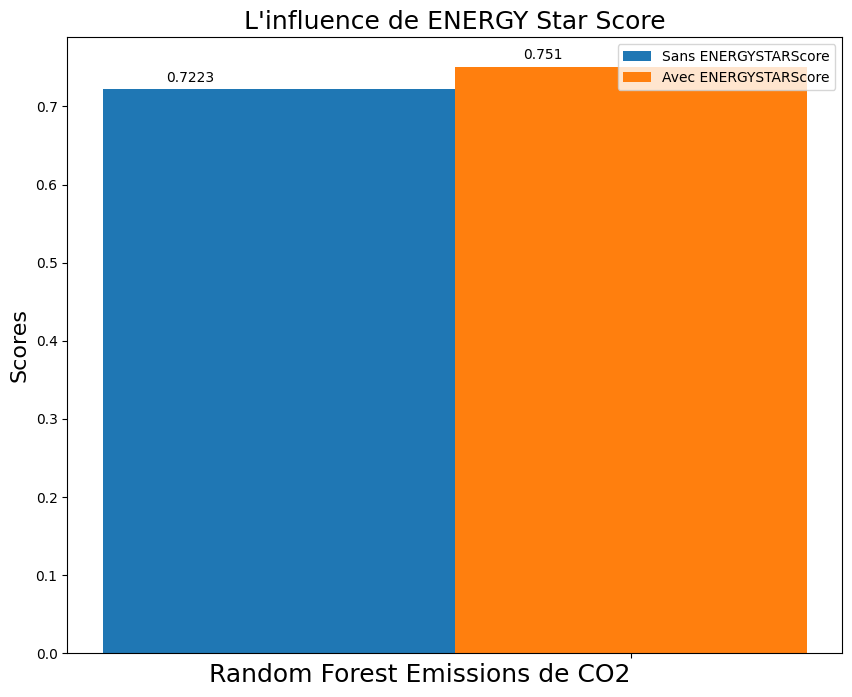

In [115]:
Graphe_Results_model(results2forest,results2forestW ,"R2",Labels_target[0],10,8)


# 1.4.1.2 GradientBoostingRegressor

In [116]:
# Définition du modèle Gradient Boost
modele_gb = GradientBoostingRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid_gb = {
    'n_estimators': [100, 200, 300], # Nombre d'estimateurs
    'learning_rate': [0.1, 0.05, 0.01], # Taux d'apprentissage
    'max_depth': [3, 5, 10], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_gb3 = GridSearchCV(modele_gb, param_grid_gb, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeGB3 = time.time()
grid_search_gb3.fit(X2New_train, y2_train)
elapsed_timeGB3 = time.time() - start_timeGB3
best_gb3 = grid_search_gb3.best_estimator_
y2_predGB3 = best_gb3.predict(X2New_test)
r2_2GB3 = r2_score(y2_test, y2_predGB3)
mse2GB3 = mean_squared_error(y2_test, y2_predGB3)


results2gbW = pd.DataFrame({'Variable': ['Log_TotalGHGEmissions'],
                        'Modèle': ['Gradient Boost'],
                        'R2': [r2_2GB3],
                        'RMSE': [mse2GB3 ** 0.5],
                        'MAE': [abs(y2_test - y2_predGB3).mean()],
                        'Temps d\'exécution': [elapsed_timeGB3],
                         'Score': best_gb3.score(X2New_test, y2_test)
                              })

In [117]:
results2gbW =round(results2gbW ,4)
results2gbW

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_TotalGHGEmissions,Gradient Boost,0.7612,0.7025,0.5172,55.9447,0.7612


In [118]:
print("Résultats pour la variable  Log_TotalGHGEmissions :")
results4 = pd.concat([results2gb,results2gbW ])
#Rindexer la base avec les noms des produits
results4.set_index('Modèle',inplace=True)
results4

Résultats pour la variable  Log_TotalGHGEmissions :


,Variable,R2,RMSE,MAE,Temps d'exécution,Score
Modèle,,,,,,
Gradient Boost,Log_TotalGHGEmissions,0.7186,0.7625,0.5724,52.1360,0.7186
Gradient Boost,Log_TotalGHGEmissions,0.7612,0.7025,0.5172,55.9447,0.7612


- **Nous constatons que ENERGY Star Score a amélioré le coefficient de détermination (0.7186 ==> 0.7612).**

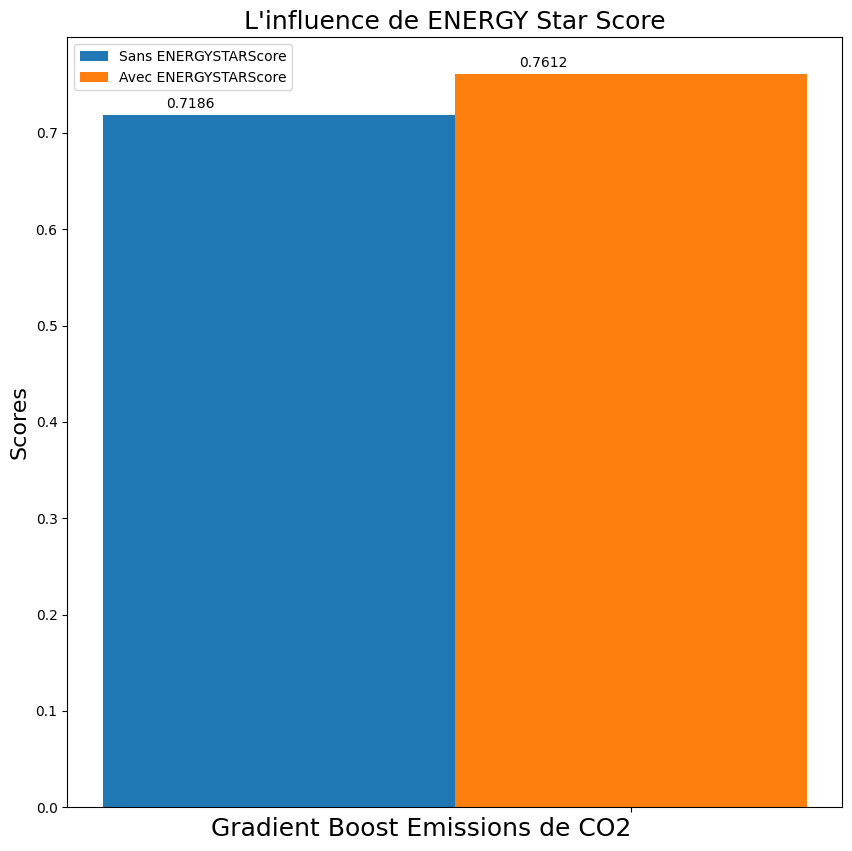

In [119]:
Graphe_Results_model(results2gb,results2gbW ,"R2",Labels_target[0],10,10)

# 1.4.2 L'influence de ENERGY Star Score sur la prédication de la consommation d'énergie 'Log_SiteEnergyUse(kBtu)':

# 1.4.2.1 Modèle RandomForestRegressor

In [120]:
# Définition du modèle Random Forest
modele_rf = RandomForestRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Nombre d'arbres dans la forêt
    'max_depth': [5, 10, 20, None], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf4 = GridSearchCV(modele_rf, param_grid_rf, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeRF4 = time.time()
grid_search_rf4.fit(X2New_train, y_train)
elapsed_timeRF4 = time.time() - start_timeRF4
best_rf4 = grid_search_rf4.best_estimator_
y_predRF4 = best_rf4.predict(X2New_test)
r2_2RF4 = r2_score(y_test, y_predRF4)
mse2RF4 = mean_squared_error(y_test, y_predRF4)


# Affichage des résultats pour consommation d'énergie
results1forestW = pd.DataFrame({'Variable': ['Log_SiteEnergyUse(kBtu)'],
                         'Modèle': ['Random Forest'],
                         'R2': [r2_2RF4],
                         'RMSE': [mse2RF4 ** 0.5],
                         'MAE': [abs(y_test - y_predRF4).mean()],
                         'Temps d\'exécution': [elapsed_timeRF4],
                         'Score': best_rf4.score(X2New_test, y_test)
                              })


In [121]:
results1forestW  =round(results1forestW ,4)
results1forestW 

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_SiteEnergyUse(kBtu),Random Forest,0.8005,0.5773,0.4262,43.481,0.8005


In [122]:
print("Résultats pour la variable Log_SiteEnergyUse(kBtu) :")
results5 = pd.concat([results1forest,results1forestW])
#Rindexer la base avec les noms des produits
results5.set_index('Modèle',inplace=True)
results5

Résultats pour la variable Log_SiteEnergyUse(kBtu) :


,Variable,R2,RMSE,MAE,Temps d'exécution,Score
Modèle,,,,,,
Random Forest,Log_SiteEnergyUse(kBtu),0.7553,0.6394,0.4764,34.6139,0.7553
Random Forest,Log_SiteEnergyUse(kBtu),0.8005,0.5773,0.4262,43.4810,0.8005


 - **Nous constatons que ENERGY Star Score a amélioré le coefficien de détermination (0.7553 ==> 0.8005).**

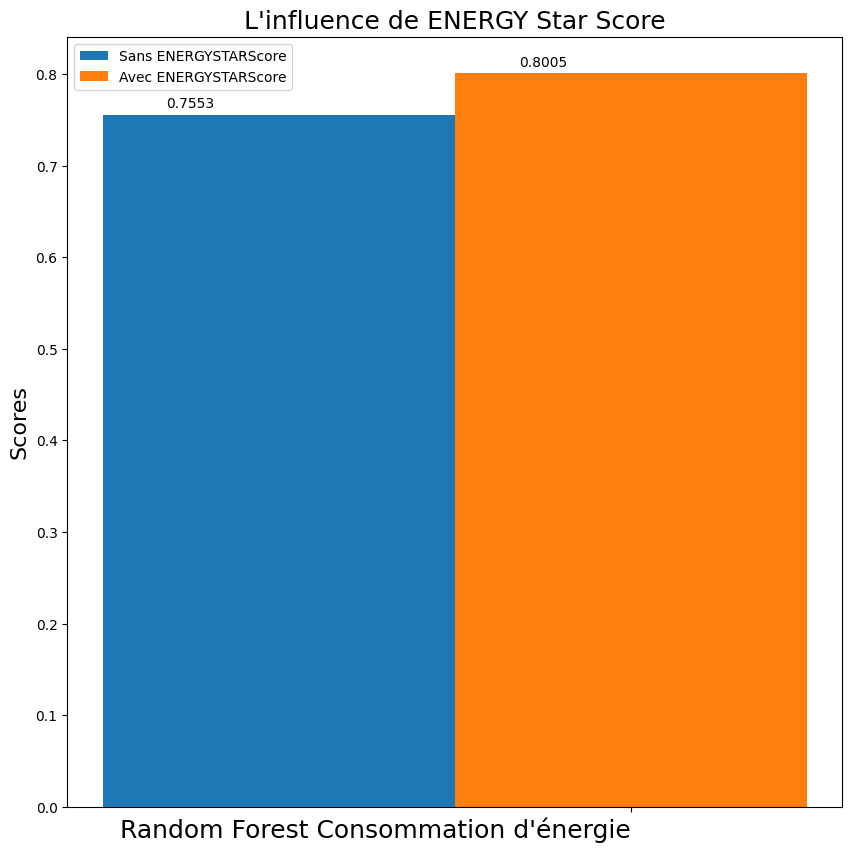

In [123]:
Graphe_Results_model(results1forest,results1forestW ,"R2",Labels_target[1],10,10)

# 1.4.2.2 GradientBoostingRegressor

In [124]:
# Définition du modèle Gradient Boost
modele_gb = GradientBoostingRegressor(random_state=42)

# Définition de la grille de paramètres
param_grid_gb = {
    'n_estimators': [100, 200, 300], # Nombre d'estimateurs
    'learning_rate': [0.1, 0.05, 0.01], # Taux d'apprentissage
    'max_depth': [3, 5, 10], # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10], # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4], # Nombre minimum d'échantillons requis dans chaque feuille
    'max_features': ['auto', 'sqrt'] # Nombre de features à considérer lors de la recherche de la meilleure séparation
}

# Recherche des meilleurs hyperparamètres à l'aide de GridSearchCV avec K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_gb4 = GridSearchCV(modele_gb, param_grid_gb, cv=kf, scoring='r2', n_jobs=-1)


# Entraînement et prédiction pour la variable de consommation d'énergie
start_timeGB4 = time.time()
grid_search_gb4.fit(X2New_train, y_train)
elapsed_timeGB4 = time.time() - start_timeGB4
best_gb4 = grid_search_gb4.best_estimator_
y_predGB4 = best_gb4.predict(X2New_test)
r2_2GB4 = r2_score(y_test, y_predGB4)
mse2GB4 = mean_squared_error(y_test, y_predGB4)


results1gbW = pd.DataFrame({'Variable': ['Log_SiteEnergyUse(kBtu)'],
                        'Modèle': ['Gradient Boost'],
                        'R2': [r2_2GB4],
                        'RMSE': [mse2GB4 ** 0.5],
                        'MAE': [abs(y_test - y_predGB4).mean()],
                        'Temps d\'exécution': [elapsed_timeGB4],
                         'Score': best_gb4.score(X2New_test, y_test)
                              })


In [125]:
results1gbW  =round(results1gbW ,4)
results1gbW

,Variable,Modèle,R2,RMSE,MAE,Temps d'exécution,Score
0,Log_SiteEnergyUse(kBtu),Gradient Boost,0.8163,0.554,0.4129,57.6981,0.8163


In [126]:
print("Résultats pour la variable Log_SiteEnergyUse(kBtu) :")
results6 = pd.concat([results1gb,results1gbW])
#Rindexer la base avec les noms des produits
results6.set_index('Modèle',inplace=True)
results6

Résultats pour la variable Log_SiteEnergyUse(kBtu) :


,Variable,R2,RMSE,MAE,Temps d'exécution,Score
Modèle,,,,,,
Gradient Boost,Log_SiteEnergyUse(kBtu),0.7538,0.6414,0.4806,49.5516,0.7538
Gradient Boost,Log_SiteEnergyUse(kBtu),0.8163,0.5540,0.4129,57.6981,0.8163


 - **Nous constatons que ENERGY Star Score a amélioré le coefficient de détermination (0.7538 ==> 0.8163).**

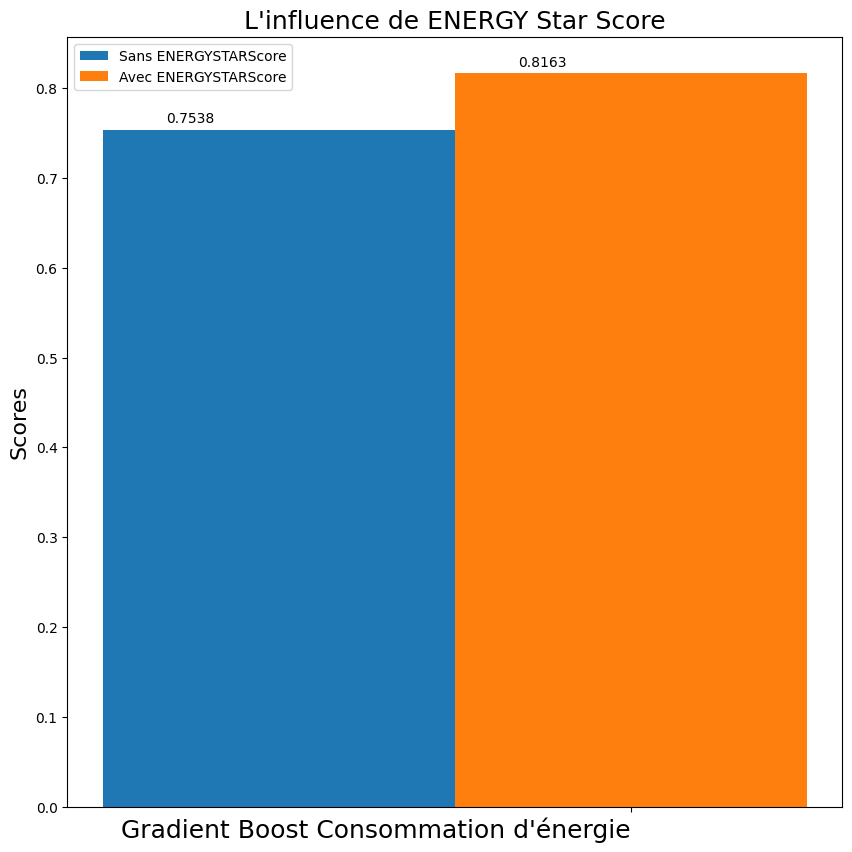

In [127]:
Graphe_Results_model(results1gb,results1gbW,"R2",Labels_target[1],10,10)

# **1.5 Conclusion**

- **Prédiction de la consommation énergétique :**
    - Le meilleur modèle trouvé:  Random Forest
     - Performance sur les données test :  R2 =  75,53 %

- **Prédiction d’émissions de CO2 :**
    - Le meilleur modèle trouvé:  Random Forest 
    - Performance sur les données test :  R2 =  72,23 %

- **Intérêt de la variable Energy STAR Score :**
   - Elle améliore les modèles lorsqu’elle est présente
   
 - **Feature Importance :**
    - L’analyse des features montre l’importance des variables surface (PropertyGFATotal)
